In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
np.set_printoptions(precision=4)

In [ ]:
df = pd.read_csv('/content/df_cleaned.csv')

In [ ]:
df.head(2)

Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Female     Very good                 4.0               0.0   
1    Male     Very good                 0.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   

   SleepHours  RemovedTeeth HadHeartAttack HadAngina  ... HeightInMeters  \
0         9.0  None of them             No        No  ...           1.60   
1         6.0  None of them             No        No  ...           1.78   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0             71.67  27.99              No         No          Yes   
1             95.25  30.13              No         No          Yes   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0           Yes                                 Yes, received Tdap   
1           Yes  Yes, received tetanus shot but not sure what type   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  

[2 rows x 39 columns]

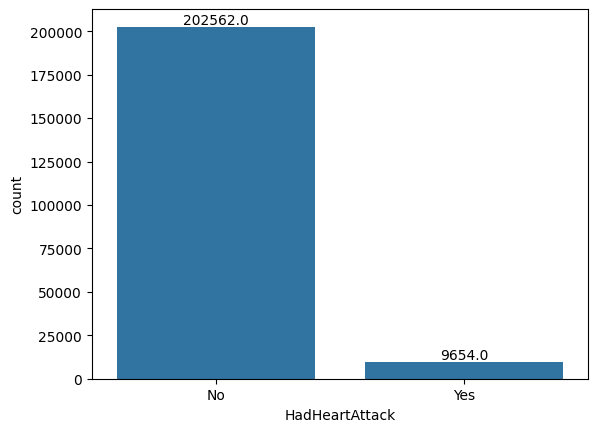

In [ ]:
countplot=sns.countplot(data = df , x = "HadHeartAttack")

#annotate the bars of the graph
for bar in countplot.patches:
    countplot.text(bar.get_x() + bar.get_width()/2,
                  bar.get_height(), str(bar.get_height()),va='bottom',
                   ha= "center")

plt.show()

## Convert string into integers , LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_col =df.select_dtypes(exclude='number').columns
categorical_col

Index(['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
df.select_dtypes(exclude='object')

PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                      4.0               0.0         9.0            1.60   
1                      0.0               0.0         6.0            1.78   
2                      0.0               0.0         8.0            1.85   
3                      5.0               0.0         9.0            1.70   
4                      3.0              15.0         5.0            1.55   
...                    ...               ...         ...             ...   
212211                 0.0               0.0         6.0            1.78   
212212                 0.0               7.0         7.0            1.93   
212213                 0.0              15.0         7.0            1.68   
212214                 2.0               2.0         7.0            1.70   
212215                 0.0               0.0         5.0            1.83   

        WeightInKilograms    BMI  
0                   71.67  27.99  
1                   95.25  30.13  
2                  108.86  31.66  
3                   90.72  31.32  
4                   79.38  33.07  
...                   ...    ...  
212211             102.06  32.28  
212212              90.72  24.34  
212213              83.91  29.86  
212214              83.01  28.66  
212215             108.86  32.55  

[212216 rows x 6 columns]

In [ ]:
encoder = LabelEncoder()
for col in categorical_col:
    df[col] = encoder.fit_transform(df[col])


df.head(3)

Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  LastCheckupTime  \
0    0              4                 4.0               0.0                3   
1    1              4                 0.0               0.0                3   
2    1              4                 0.0               0.0                3   

   PhysicalActivities  SleepHours  RemovedTeeth  HadHeartAttack  HadAngina  \
0                   1         9.0             3               0          0   
1                   1         6.0             3               0          0   
2                   0         8.0             1               0          0   

   ...  HeightInMeters  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
0  ...            1.60              71.67  27.99                0           0   
1  ...            1.78              95.25  30.13                0           0   
2  ...            1.85             108.86  31.66                1           0   

   FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0             1              1                  1                 0         0  
1             1              1                  2                 0         0  
2             0              1                  0                 0         1  

[3 rows x 39 columns]

In [ ]:
categorical_col =df.select_dtypes(exclude='number').columns
categorical_col

Index([], dtype='object')

- As we can see there is no string in the column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212216 entries, 0 to 212215
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        212216 non-null  int64  
 1   GeneralHealth              212216 non-null  int64  
 2   PhysicalHealthDays         212216 non-null  float64
 3   MentalHealthDays           212216 non-null  float64
 4   LastCheckupTime            212216 non-null  int64  
 5   PhysicalActivities         212216 non-null  int64  
 6   SleepHours                 212216 non-null  float64
 7   RemovedTeeth               212216 non-null  int64  
 8   HadHeartAttack             212216 non-null  int64  
 9   HadAngina                  212216 non-null  int64  
 10  HadStroke                  212216 non-null  int64  
 11  HadAsthma                  212216 non-null  int64  
 12  HadSkinCancer              212216 non-null  int64  
 13  HadCOPD                    21

## Data Split

In [ ]:
X = df.drop("HadHeartAttack", axis =1)

#predicted class
y = pd.Series(data = df['HadHeartAttack'])

print(X.head(2))
print("The shape of X", X.shape)

print(50* "*")

print('the shape of y', y.shape)

   Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  LastCheckupTime  \
0    0              4                 4.0               0.0                3   
1    1              4                 0.0               0.0                3   

   PhysicalActivities  SleepHours  RemovedTeeth  HadAngina  HadStroke  ...  \
0                   1         9.0             3          0          0  ...   
1                   1         6.0             3          0          0  ...   

   HeightInMeters  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
0            1.60              71.67  27.99                0           0   
1            1.78              95.25  30.13                0           0   

   FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0             1              1                  1                 0         0  
1             1              1                  2                 0         0  

[2 rows x 38 columns]
The shape of X (212216, 38)
****

# SMOTE

- As we can see from countplot we have not balance data, for balancing the dataset, we use SMOTE, Therefore Somehow data can be close each bar

In [ ]:
! pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:

smote_ = SMOTE(random_state=42, k_neighbors=4, sampling_strategy=.15)
smote_

SMOTE(k_neighbors=4, random_state=42, sampling_strategy=0.15)

In [ ]:
data=smote_.fit_resample(X, y)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([202562,   9654]))

In [ ]:
data

(        Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
 0         0              4                 4.0           0.00000   
 1         1              4                 0.0           0.00000   
 2         1              4                 0.0           0.00000   
 3         0              1                 5.0           0.00000   
 4         0              2                 3.0          15.00000   
 ...     ...            ...                 ...               ...   
 232941    1              1                15.0           0.00000   
 232942    0              2                 0.0           0.00000   
 232943    1              2                 0.0           0.00000   
 232944    1              1                 0.0           0.00000   
 232945    0              2                 0.0           4.66077   
 
         LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
 0                     3                   1    9.000000             3   
 1                    

In [ ]:
data[0]

Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0         0              4                 4.0           0.00000   
1         1              4                 0.0           0.00000   
2         1              4                 0.0           0.00000   
3         0              1                 5.0           0.00000   
4         0              2                 3.0          15.00000   
...     ...            ...                 ...               ...   
232941    1              1                15.0           0.00000   
232942    0              2                 0.0           0.00000   
232943    1              2                 0.0           0.00000   
232944    1              1                 0.0           0.00000   
232945    0              2                 0.0           4.66077   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                     3                   1    9.000000             3   
1                     3                   1    6.000000             3   
2                     3                   0    8.000000             1   
3                     3                   1    9.000000             3   
4                     3                   1    5.000000             0   
...                 ...                 ...         ...           ...   
232941                3                   0    6.787186             0   
232942                3                   0    8.494997             1   
232943                3                   0    7.356691             1   
232944                3                   0    9.000000             3   
232945                3                   0    7.000000             1   

        HadAngina  HadStroke  ...  HeightInMeters  WeightInKilograms  \
0               0          0  ...        1.600000          71.670000   
1               0          0  ...        1.780000          95.250000   
2               0          0  ...        1.850000         108.860000   
3               0          0  ...        1.700000          90.720000   
4               0          0  ...        1.550000          79.380000   
...           ...        ...  ...             ...                ...   
232941          1          0  ...        1.734256          83.910000   
232942          0          0  ...        1.730000          99.790000   
232943          1          0  ...        1.760701          81.650000   
232944          0          0  ...        1.812605          92.356806   
232945          0          0  ...        1.771519          67.885650   

              BMI  AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
0       27.990000                0           0             1              1   
1       30.130000                0           0             1              1   
2       31.660000                1           0             0              1   
3       31.320000                0           0             1              1   
4       33.070000                0           0             1              1   
...           ...              ...         ...           ...            ...   
232941  27.957621                0           1             0              1   
232942  33.450000                1           0             1              1   
232943  26.312482                0           0             0              0   
232944  28.161825                1           0             1              0   
232945  21.686223                0           0             0              0   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0                       1                 0         0  
1                       2                 0         0  
2                       0                 0         1  
3                       0                 0         1  
4                       0                 0         0  
...                   ...               ...       ...  
232941                  0                 0         1  
232942                  2                 0         

In [ ]:
np.unique(data[1], return_counts=True)

(array([0, 1]), array([202562,  30384]))

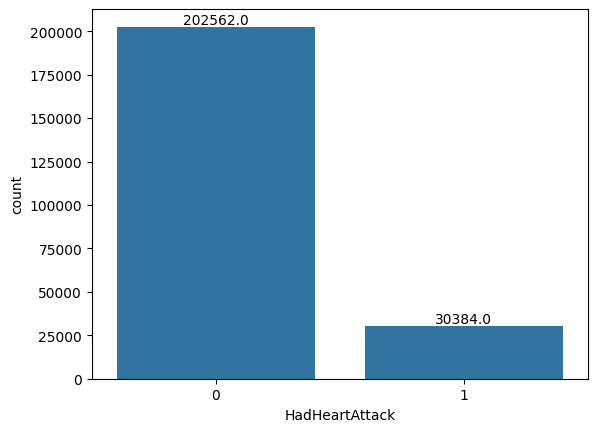

In [ ]:
countplot=sns.countplot(data = df , x = data[1])

#annotate the bars of the graph
for bar in countplot.patches:
    countplot.text(bar.get_x() + bar.get_width()/2,
                  bar.get_height(), str(bar.get_height()),va='bottom',
                   ha= "center")

plt.show()

In [ ]:
X = data[0]
y = data[1]

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
232941    1
232942    1
232943    1
232944    1
232945    1
Name: HadHeartAttack, Length: 232946, dtype: int64

## Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.10, shuffle=True, stratify=y)

print(f'X_train Shape {X_train.shape} & y_traim Shape {y_train.shape}')
print(f'X_test Shape {X_test.shape} & y_test Shape {y_test.shape}')

X_train Shape (209651, 38) & y_traim Shape (209651,)
X_test Shape (23295, 38) & y_test Shape (23295,)


In [ ]:
! pip install lightgbm

:# Machine leaning Implementation

In [ ]:
# import required Algo of ML
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, jaccard_score
from sklearn.model_selection import cross_val_score


In [ ]:
def objective(trial):
    classifiers_name = trial.suggest_categorical('classifier', [
        'RandomForestClassifier', 'KNeighborsClassifier',
        'GradientBoostingClassifier', 'ExtraTreesClassifier',
        'HistGradientBoostingClassifier', 'LGBMClassifier'
    ])

    if classifiers_name == 'RandomForestClassifier':
        n_estimators_rf = trial.suggest_int('n_estimators', low=100, high=502, step=3)
        max_depth_rf = trial.suggest_int('max_depth', low=10, high=38, step =2)
        min_samples_split_rf = trial.suggest_float('min_samples_split', low=.05, high= .9)
        min_samples_leaf_rf = trial.suggest_float('min_samples_leaf', low= 0.00, high=1.0)
        bootstrap_rf = trial.suggest_categorical('bootstrap', [True, False])

        model = RandomForestClassifier(
            n_estimators=n_estimators_rf, max_depth=max_depth_rf,
            min_samples_split=min_samples_split_rf, min_samples_leaf=min_samples_leaf_rf,
            bootstrap=bootstrap_rf
        )

    elif classifiers_name == 'KNeighborsClassifier':
        n_neighbors_knn = trial.suggest_int('n_neighbors', low=2, high=12, step=1)
        weights_knn = trial.suggest_categorical('weights', ['uniform', 'distance'])
        algorithm_knn = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
        leaf_size_knn = trial.suggest_int('leaf_size', low=20, high=50, step=1)
        p_knn = trial.suggest_int('p', low=1, high=2, step=1)
        model = KNeighborsClassifier(
            n_neighbors=n_neighbors_knn, weights=weights_knn, algorithm=algorithm_knn,
            leaf_size=leaf_size_knn, p=p_knn)
    elif classifiers_name == 'GradientBoostingClassifier':
        n_estimators_gb = trial.suggest_int('n_estimators', low=100, high=502, step=3)
        learning_rate_gb = trial.suggest_float('learning_rate', 0.009, 1.25)
        max_depth_gb = trial.suggest_int('max_depth', low =2, high=36, step=1)
        min_samples_leaf_gb = trial.suggest_float('min_samples_leaf', .05, .98)

        model = GradientBoostingClassifier(
            n_estimators=n_estimators_gb, learning_rate=learning_rate_gb,
            max_depth=max_depth_gb, min_samples_leaf=min_samples_leaf_gb
        )

    elif classifiers_name == 'ExtraTreesClassifier':
        n_estimators_etc = trial.suggest_int('n_estimators', low=100, high=502, step=3)
        max_depth_etc = trial.suggest_int('max_depth', low=1, high=39, step= 1)
        bootstrap_etc = trial.suggest_categorical('bootstrap', [True, False])
        criterion_etc = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        max_features_etc = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

        model = ExtraTreesClassifier(
            n_estimators=n_estimators_etc, max_depth=max_depth_etc,
            bootstrap=bootstrap_etc, criterion=criterion_etc, max_features=max_features_etc
        )

    elif classifiers_name == 'HistGradientBoostingClassifier':
        max_iter_hist = trial.suggest_int('max_iter', low=90, high=150, step = 1)
        max_depth_hist = trial.suggest_int('max_depth', low=1, high=39, step =1)
        l2_regularization_hist = trial.suggest_float('l2_regularization', 0.01, 2.0, step = .003)
        learning_rate_hist = trial.suggest_float('learning_rate', 0.009, 1.25, step=.003)
        max_bins_hist = trial.suggest_int('max_bins', low=23, high=255, step =2)
        max_leaf_nodes_hist = trial.suggest_int('max_leaf_nodes', 16, 70 , step =1)

        model = HistGradientBoostingClassifier(
            max_iter=max_iter_hist, max_depth=max_depth_hist, l2_regularization=l2_regularization_hist,
            learning_rate=learning_rate_hist, max_bins=max_bins_hist,
            max_leaf_nodes=max_leaf_nodes_hist
        )

    elif classifiers_name == "LGBMClassifier":
        n_estimators_lgb = trial.suggest_int('n_estimators', low=400, high=550, step=1)
        max_depth_lgb = trial.suggest_int('max_depth', low=8, high=39, step=1)
        boosting_type_lgb = trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss'])
        learning_rate_lgb = trial.suggest_float('learning_rate', 0.1, 1.25, step= .0001)
        min_child_samples_lgb = trial.suggest_int('min_child_samples', 18, 25, step=1)
        reg_lambda_lgb = trial.suggest_float('reg_lambda', 0.1, 2.5, step=.0002)

        model = LGBMClassifier(
            n_estimators=n_estimators_lgb, max_depth=max_depth_lgb,
            boosting_type=boosting_type_lgb, learning_rate=learning_rate_lgb,
            min_child_samples=min_child_samples_lgb, reg_lambda=reg_lambda_lgb
        )

    score = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy').mean()
    return score
from optuna.samplers import TPESampler

# Create study with TPE Sampler for categorical and continuous hyperparameter search
study = optuna.create_study(direction='maximize', sampler=TPESampler())

# Run the optimization for 20 trials
study.optimize(objective, n_trials=333)

[I 2024-10-27 09:45:28,829] A new study created in memory with name: no-name-73d8a4ce-6b98-41d8-aed0-c3a94b137da7
[I 2024-10-27 09:45:38,226] Trial 0 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 379, 'max_depth': 10, 'min_samples_split': 0.5848354212933431, 'min_samples_leaf': 0.6293698418708968, 'bootstrap': True}. Best is trial 0 with value: 0.8695678410153775.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 09:45:44,146] Trial 1 finished with value: 0.953148414478382 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 475, 'max_depth': 35, 'boosting_type': 'goss', 'learning_rate': 0.4666, 'min_child_samples': 20, 'reg_lambda': 1.8194000000000001}. Best is trial 1 with value: 0.953148414478382.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2024-10-27 09:45:47,665] Trial 2 finished with value: 0.9132866007583148 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 36, 'p': 2}. Best is trial 1 with value: 0.953148414478382.
[I 2024-10-27 09:45:56,826] Trial 3 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 382, 'max_depth': 20, 'min_samples_split': 0.7567854196024797, 'min_samples_leaf': 0.08141147166967444, 'bootstrap': True}. Best is trial 1 with value: 0.953148414478382.
[I 2024-10-27 09:46:00,709] Trial 4 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 157, 'max_depth': 36, 'min_samples_split': 0.831843744169605, 'min_samples_leaf': 0.8143881745631574, 'bootstrap': True}. Best is trial 1 with value: 0.953148414478382.
[I 2024-10-27 09:46:11,241] Trial 5 finished with value: 0.8697639569148454 and parameters: {'c

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 10:00:06,273] Trial 10 finished with value: 0.9497239291569027 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 544, 'max_depth': 39, 'boosting_type': 'goss', 'learning_rate': 0.8616, 'min_child_samples': 20, 'reg_lambda': 1.8820000000000001}. Best is trial 1 with value: 0.953148414478382.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of da

[I 2024-10-27 10:00:13,208] Trial 11 finished with value: 0.9477728273878367 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 550, 'max_depth': 39, 'boosting_type': 'goss', 'learning_rate': 0.9163, 'min_child_samples': 20, 'reg_lambda': 1.8674000000000002}. Best is trial 1 with value: 0.953148414478382.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of da

[I 2024-10-27 10:00:19,291] Trial 12 finished with value: 0.951976747694381 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 481, 'max_depth': 30, 'boosting_type': 'goss', 'learning_rate': 0.6019, 'min_child_samples': 20, 'reg_lambda': 1.8898000000000001}. Best is trial 1 with value: 0.953148414478382.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 10:00:21,638] Trial 13 finished with value: 0.9351409520169766 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 128, 'max_depth': 29, 'l2_regularization': 0.061000000000000006, 'learning_rate': 0.393, 'max_bins': 145, 'max_leaf_nodes': 42}. Best is trial 1 with value: 0.953148414478382.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 10:00:27,453] Trial 14 finished with value: 0.9521577777554284 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 471, 'max_depth': 31, 'boosting_type': 'goss', 'learning_rate': 0.5412, 'min_child_samples': 19, 'reg_lambda': 0.8686}. Best is trial 1 with value: 0.953148414478382.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006794 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 10:00:35,403] Trial 15 finished with value: 0.9537971055304684 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 448, 'max_depth': 32, 'boosting_type': 'dart', 'learning_rate': 0.5616, 'min_child_samples': 25, 'reg_lambda': 0.4122}. Best is trial 15 with value: 0.9537971055304684.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 12969, number of negative: 86

[I 2024-10-27 10:00:43,032] Trial 16 finished with value: 0.8769096157134093 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 441, 'max_depth': 25, 'boosting_type': 'dart', 'learning_rate': 1.2271, 'min_child_samples': 25, 'reg_lambda': 0.13720000000000002}. Best is trial 15 with value: 0.9537971055304684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-27 10:00:46,710] Trial 17 finished with value: 0.8695678410153775 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 286, 'learning_rate': 0.055685431136908436, 'max_depth': 25, 'min_samples_leaf': 0.9635043908134431}. Best is trial 15 with value: 0.9537971055304684.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 10:00:48,545] Trial 18 finished with value: 0.9188532751355212 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 93, 'max_depth': 34, 'l2_regularization': 1.954, 'learning

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:00:53,754] Trial 19 finished with value: 0.9537971055304684 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 458, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.4084, 'min_child_samples': 24, 'reg_lambda': 1.0046000000000002}. Best is trial 15 with value: 0.9537971055304684.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:00:58,879] Trial 20 finished with value: 0.9541340225885286 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 444, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.3096, 'min_child_samples': 25, 'reg_lambda': 0.7462}. Best is trial 20 with value: 0.9541340225885286.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:01:03,975] Trial 21 finished with value: 0.9543753960032586 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 444, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.2953, 'min_child_samples': 25, 'reg_lambda': 0.7658}. Best is trial 21 with value: 0.9543753960032586.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:01:08,999] Trial 22 finished with value: 0.9543301384879967 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 439, 'max_depth': 23, 'boosting_type': 'gbdt', 'learning_rate': 0.22000000000000003, 'min_child_samples': 23, 'reg_lambda': 0.40700000000000003}. Best is trial 21 with value: 0.9543753960032586.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:01:13,987] Trial 23 finished with value: 0.9545664832899197 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 427, 'max_depth': 21, 'boosting_type': 'gbdt', 'learning_rate': 0.1862, 'min_child_samples': 23, 'reg_lambda': 0.661}. Best is trial 23 with value: 0.9545664832899197.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:01:18,979] Trial 24 finished with value: 0.9547726564150014 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 424, 'max_depth': 20, 'boosting_type': 'gbdt', 'learning_rate': 0.14150000000000001, 'min_child_samples': 23, 'reg_lambda': 0.5256000000000001}. Best is trial 24 with value: 0.9547726564150014.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:01:24,030] Trial 25 finished with value: 0.9544256821313273 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 422, 'max_depth': 18, 'boosting_type': 'gbdt', 'learning_rate': 0.1178, 'min_child_samples': 22, 'reg_lambda': 1.1342}. Best is trial 24 with value: 0.9547726564150014.
[I 2024-10-27 10:07:24,689] Trial 26 finished with value: 0.9057839104504631 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 12, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 22, 'p': 1}. Best is trial 24 with value: 0.9547726564150014.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible b

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:08:26,433] Trial 30 finished with value: 0.9549285434120143 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 424, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.20350000000000001, 'min_child_samples': 22, 'reg_lambda': 1.3154000000000001}. Best is trial 30 with value: 0.9549285434120143.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:08:31,373] Trial 31 finished with value: 0.9547173416741257 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 424, 'max_depth': 16, 'boosting_type': 'gbdt', 'learning_rate': 0.18130000000000002, 'min_child_samples': 22, 'reg_lambda': 1.3146000000000002}. Best is trial 30 with value: 0.9549285434120143.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:08:36,286] Trial 32 finished with value: 0.9550090012169243 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 422, 'max_depth': 16, 'boosting_type': 'gbdt', 'learning_rate': 0.20400000000000001, 'min_child_samples': 22, 'reg_lambda': 1.4666000000000001}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:08:41,133] Trial 33 finished with value: 0.9543552815520311 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 419, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.3357, 'min_child_samples': 22, 'reg_lambda': 1.3874000000000002}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:08:45,908] Trial 34 finished with value: 0.9545463688386921 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 411, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.20140000000000002, 'min_child_samples': 23, 'reg_lambda': 1.4586000000000001}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:08:50,606] Trial 35 finished with value: 0.954868200058332 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 413, 'max_depth': 10, 'boosting_type': 'gbdt', 'learning_rate': 0.2148, 'min_child_samples': 21, 'reg_lambda': 1.6104}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:08:57,443] Trial 36 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 334, 'max_depth': 12, 'min_samples_split': 0.15950909841905003, 'min_samples_leaf': 0.6085102995994389, 'bootstrap': False}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:09:08,204] Trial 37 finished with value: 0.8937303255523932 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 11, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 49, 'p': 2}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:11:17,346] Trial 38 finished with value: 0.8913618489203567 and parameters: {'cl

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:11:22,472] Trial 39 finished with value: 0.9542647665215074 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 412, 'max_depth': 19, 'boosting_type': 'gbdt', 'learning_rate': 0.3498, 'min_child_samples': 21, 'reg_lambda': 2.3702}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:12:09,378] Trial 40 finished with value: 0.8959781154770645 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 271, 'learning_rate': 0.09066222026287064, 'max_depth': 9, 'min_samples_leaf': 0.2957788525510405}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:12:14,725] Trial 41 finished with value: 0.9548179139302633 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 431, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.1927, 'min_child_samples': 22, 'reg_lambda': 1.5508000000000002}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:12:19,952] Trial 42 finished with value: 0.9547374561253532 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 430, 'max_depth': 12, 'boosting_type': 'gbdt', 'learning_rate': 0.2693, 'min_child_samples': 21, 'reg_lambda': 1.5848000000000002}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:12:25,342] Trial 43 finished with value: 0.9548732286711388 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 433, 'max_depth': 14, 'boosting_type': 'gbdt', 'learning_rate': 0.19080000000000003, 'min_child_samples': 22, 'reg_lambda': 1.5538}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:12:30,628] Trial 44 finished with value: 0.9532741297985539 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 433, 'max_depth': 14, 'boosting_type': 'gbdt', 'learning_rate': 0.46599999999999997, 'min_child_samples': 21, 'reg_lambda': 1.6376000000000002}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:13:07,540] Trial 45 finished with value: 0.8923122567408555 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 385, 'max_depth': 8, 'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'sqrt'}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:13:16,748] Trial 46 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 367, 'max_depth': 14, 'min_samples_split': 0.36798470190103316, 'min_samples_leaf': 0.9980472540988874, 'bootstrap': True}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:13:22,238] Trial 47 finished with value: 0.9545664832899197 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 463, 'max_depth': 10, 'boosting_type': 'gbdt', 'learning_rate': 0.23800000000000002, 'min_child_samples': 22, 'reg_lambda': 1.1724}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:13:52,861] Trial 48 finished with value: 0.9353823254317064 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 50, 'p': 1}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:13:57,901] Trial 49 finished with value: 0.9540133358811638 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 414, 'max_depth': 11, 'boosting_type': 'gbdt', 'learning_rate': 0.41080000000000005, 'min_child_samples': 21, 'reg_lambda': 1.578}. Best is trial 32 with value: 0.9550090012169243.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 10:14:01,766] Trial 50 finished with value: 0.8986382516518994 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 90, 'max_depth': 7, 'l2_regularization':

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:14:07,213] Trial 51 finished with value: 0.9547324275125464 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 432, 'max_depth': 20, 'boosting_type': 'gbdt', 'learning_rate': 0.1603, 'min_child_samples': 23, 'reg_lambda': 1.6328000000000003}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:14:12,318] Trial 52 finished with value: 0.9545413402258853 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 417, 'max_depth': 16, 'boosting_type': 'gbdt', 'learning_rate': 0.2515, 'min_child_samples': 22, 'reg_lambda': 1.3744}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:14:18,009] Trial 53 finished with value: 0.9546469410948296 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 454, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.1729, 'min_child_samples': 23, 'reg_lambda': 2.1504000000000003}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:14:28,429] Trial 54 finished with value: 0.9535909324053866 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 493, 'max_depth': 17, 'boosting_type': 'dart', 'learning_rate': 0.253, 'min_child_samples': 22, 'reg_lambda': 1.1756000000000002}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:14:33,717] Trial 55 finished with value: 0.9544156249057135 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 432, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.3411, 'min_child_samples': 24, 'reg_lambda': 1.4856000000000003}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:14:40,156] Trial 56 finished with value: 0.9469984210155786 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 514, 'max_depth': 20, 'boosting_type': 'gbdt', 'learning_rate': 0.9931, 'min_child_samples': 21, 'reg_lambda': 1.6764000000000001}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:14:45,653] Trial 57 finished with value: 0.954516197161851 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 436, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.1597, 'min_child_samples': 22, 'reg_lambda': 1.7380000000000002}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:15:39,290] Trial 58 finished with value: 0.8941577576409772 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 394, 'max_depth': 11, 'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 32 with value: 0.9550090012169243.
[I 2024-10-27 10:15:44,325] Trial 59 finished with value: 0.8695678410153775 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 400, 'learning_rate': 0.08460936995094463, 'max_depth': 2, 'min_samples_leaf': 0.7760621568232458}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:15:49,886] Trial 60 finished with value: 0.9527813257434804 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 450, 'max_depth': 18, 'boosting_type': 'gbdt', 'learning_rate': 0.647, 'min_child_samples': 23, 'reg_lambda': 2.0346}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:15:55,049] Trial 61 finished with value: 0.9546519697076364 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 425, 'max_depth': 12, 'boosting_type': 'gbdt', 'learning_rate': 0.27690000000000003, 'min_child_samples': 21, 'reg_lambda': 1.5354}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:16:00,324] Trial 62 finished with value: 0.9547123130613189 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 427, 'max_depth': 14, 'boosting_type': 'gbdt', 'learning_rate': 0.2702, 'min_child_samples': 21, 'reg_lambda': 1.7836}. Best is trial 32 with value: 0.9550090012169243.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:16:05,538] Trial 63 finished with value: 0.9550442015065723 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 429, 'max_depth': 12, 'boosting_type': 'gbdt', 'learning_rate': 0.21450000000000002, 'min_child_samples': 20, 'reg_lambda': 1.3396000000000001}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 10:16:11,247] Trial 64 finished with value: 0.9545765405155333 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 440, 'max_depth': 10, 'boosting_type': 'goss', 'learning_rate': 0.21380000000000002, 'min_child_samples': 19, 'reg_lambda': 1.2944000000000002}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 10:16:13,159] Trial 65 finished with value: 0.9340447144250787 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 117, 'max_depth': 4, 'l2_regularization': 0.118, 'learning_rate': 0.108, 'max_bins': 231, 'max_leaf_nodes': 17}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:16:18,309] Trial 66 finished with value: 0.953807162756082 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 416, 'max_depth': 16, 'boosting_type': 'gbdt', 'learning_rate': 0.47540000000000004, 'min_child_samples': 20, 'reg_lambda': 1.219}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 10:16:24,071] Trial 67 finished with value: 0.9546871699972845 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 422, 'max_depth': 17, 'boosting_type': 'goss', 'learning_rate': 0.1557, 'min_child_samples': 20, 'reg_lambda': 0.9904000000000001}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2024-10-27 10:16:29,679] Trial 68 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 103, 'max_depth': 14, 'min_samples_split': 0.40971465063444545, 'min_samples_leaf': 0.21045001065271496, 'bootstrap': False}. Best is trial 63 with value: 0.9550442015065723.
[I 2024-10-27 10:22:47,079] Trial 69 finished with value: 0.9088865645523025 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 9, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 22, 'p': 2}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:22:55,366] Trial 70 finished with value: 0.9535406462773179 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 445, 'max_depth': 19, 'boosting_type': 'dart', 'learning_rate': 0.735, 'min_child_samples': 22, 'reg_lambda': 1.4226}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:23:00,747] Trial 71 finished with value: 0.9547273988997396 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 432, 'max_depth': 12, 'boosting_type': 'gbdt', 'learning_rate': 0.2167, 'min_child_samples': 20, 'reg_lambda': 1.5298}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:23:06,032] Trial 72 finished with value: 0.9546972272228983 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 428, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.3023, 'min_child_samples': 21, 'reg_lambda': 1.8824}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:23:11,188] Trial 73 finished with value: 0.9547374561253532 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 420, 'max_depth': 12, 'boosting_type': 'gbdt', 'learning_rate': 0.21040000000000003, 'min_child_samples': 18, 'reg_lambda': 1.2930000000000001}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:23:16,647] Trial 74 finished with value: 0.9545463688386921 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 436, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.1501, 'min_child_samples': 19, 'reg_lambda': 1.749}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:23:21,802] Trial 75 finished with value: 0.9537166477255584 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 428, 'max_depth': 11, 'boosting_type': 'gbdt', 'learning_rate': 0.3813, 'min_child_samples': 22, 'reg_lambda': 1.0458}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:23:26,917] Trial 76 finished with value: 0.954707284448512 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 410, 'max_depth': 23, 'boosting_type': 'gbdt', 'learning_rate': 0.2812, 'min_child_samples': 24, 'reg_lambda': 1.5542000000000002}. Best is trial 63 with value: 0.9550442015065723.
[I 2024-10-27 10:23:32,730] Trial 77 finished with value: 0.8695678410153775 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 472, 'learning_rate': 0.07415027068165286, 'max_depth': 9, 'min_samples_leaf': 0.5080482733415076}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:23:42,290] Trial 78 finished with value: 0.9528416690971628 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 438, 'max_depth': 25, 'boosting_type': 'dart', 'learning_rate': 0.188, 'min_child_samples': 21, 'reg_lambda': 0.132}. Best is trial 63 with value: 0.9550442015065723.
[I 2024-10-27 10:25:53,817] Trial 79 finished with value: 0.8976576721545595 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 370, 'max_depth': 9, 'bootstrap': True, 'criterion': 'gini', 'max_features': None}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 10:25:59,400] Trial 80 finished with value: 0.9538574488841508 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 422, 'max_depth': 16, 'boosting_type': 'goss', 'learning_rate': 0.32210000000000005, 'min_child_samples': 20, 'reg_lambda': 1.4120000000000001}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007206 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 10:26:04,449] Trial 81 finished with value: 0.9544809968722028 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 420, 'max_depth': 12, 'boosting_type': 'gbdt', 'learning_rate': 0.22540000000000002, 'min_child_samples': 18, 'reg_lambda': 0.46920000000000006}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:26:09,574] Trial 82 finished with value: 0.9548933431223663 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 408, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.20600000000000002, 'min_child_samples': 18, 'reg_lambda': 1.2868000000000002}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:26:14,656] Trial 83 finished with value: 0.9544508251953616 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 408, 'max_depth': 10, 'boosting_type': 'gbdt', 'learning_rate': 0.1497, 'min_child_samples': 22, 'reg_lambda': 1.6568000000000003}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:26:19,939] Trial 84 finished with value: 0.9546067121923747 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 429, 'max_depth': 14, 'boosting_type': 'gbdt', 'learning_rate': 0.25070000000000003, 'min_child_samples': 23, 'reg_lambda': 1.4694000000000003}. Best is trial 63 with value: 0.9550442015065723.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 10:26:24,576] Trial 85 finished with value: 0.9260492200621536 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 150, 'max_depth': 7, 'l2_re

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:26:29,716] Trial 86 finished with value: 0.9542949381983485 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 415, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.13040000000000002, 'min_child_samples': 22, 'reg_lambda': 1.3174000000000001}. Best is trial 63 with value: 0.9550442015065723.
[I 2024-10-27 10:26:51,585] Trial 87 finished with value: 0.9297050215727489 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 31, 'p': 1}. Best is trial 63 with value: 0.9550442015065723.
[I 2024-10-27 10:26:57,708] Trial 88 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 247, 'max_depth': 16, 'min_samples_split': 0.6283395028134262, 'min_samples_leaf': 0.8050870137158774, 'bootstrap': True}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:03,234] Trial 89 finished with value: 0.9253904717844535 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 444, 'max_depth': 17, 'boosting_type': 'gbdt', 'learning_rate': 1.2176000000000002, 'min_child_samples': 21, 'reg_lambda': 0.2634}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:08,459] Trial 90 finished with value: 0.9549587150888557 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 425, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.1892, 'min_child_samples': 19, 'reg_lambda': 0.8704000000000001}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:13,771] Trial 91 finished with value: 0.9546620269332502 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 424, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.1917, 'min_child_samples': 19, 'reg_lambda': 0.8602}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:19,971] Trial 92 finished with value: 0.9548732286711388 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.2381, 'min_child_samples': 18, 'reg_lambda': 0.517}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:25,878] Trial 93 finished with value: 0.9543552815520311 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 514, 'max_depth': 11, 'boosting_type': 'gbdt', 'learning_rate': 0.2409, 'min_child_samples': 18, 'reg_lambda': 0.49119999999999997}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:31,693] Trial 94 finished with value: 0.9547273988997396 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 483, 'max_depth': 21, 'boosting_type': 'gbdt', 'learning_rate': 0.18680000000000002, 'min_child_samples': 18, 'reg_lambda': 0.6154}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:38,012] Trial 95 finished with value: 0.9548179139302633 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 535, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.1327, 'min_child_samples': 19, 'reg_lambda': 0.35940000000000005}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:44,370] Trial 96 finished with value: 0.9547776850278082 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 538, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.1321, 'min_child_samples': 19, 'reg_lambda': 0.26880000000000004}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:50,739] Trial 97 finished with value: 0.954511168549044 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 545, 'max_depth': 15, 'boosting_type': 'gbdt', 'learning_rate': 0.22810000000000002, 'min_child_samples': 18, 'reg_lambda': 0.32}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:27:57,008] Trial 98 finished with value: 0.9548179139302632 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 14, 'boosting_type': 'gbdt', 'learning_rate': 0.30710000000000004, 'min_child_samples': 19, 'reg_lambda': 1.1062}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:28:03,332] Trial 99 finished with value: 0.9542496806830868 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 535, 'max_depth': 18, 'boosting_type': 'gbdt', 'learning_rate': 0.37170000000000003, 'min_child_samples': 18, 'reg_lambda': 0.7514}. Best is trial 63 with value: 0.9550442015065723.
[I 2024-10-27 10:28:54,171] Trial 100 finished with value: 0.8695678410153775 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 460, 'learning_rate': 0.0671695673962241, 'max_depth': 17, 'min_samples_leaf': 0.49267668264691833}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:29:00,425] Trial 101 finished with value: 0.9544910540978166 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 525, 'max_depth': 14, 'boosting_type': 'gbdt', 'learning_rate': 0.3099, 'min_child_samples': 19, 'reg_lambda': 1.2322000000000002}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:29:06,638] Trial 102 finished with value: 0.9549687723144693 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 527, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.1905, 'min_child_samples': 19, 'reg_lambda': 1.0416}. Best is trial 63 with value: 0.9550442015065723.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:29:12,907] Trial 103 finished with value: 0.9550944876346411 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 525, 'max_depth': 13, 'boosting_type': 'gbdt', 'learning_rate': 0.175, 'min_child_samples': 19, 'reg_lambda': 0.8506}. Best is trial 103 with value: 0.9550944876346411.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:29:19,044] Trial 104 finished with value: 0.9549989439913106 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 518, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.1829, 'min_child_samples': 20, 'reg_lambda': 0.8762}. Best is trial 103 with value: 0.9550944876346411.
[I 2024-10-27 10:30:41,333] Trial 105 finished with value: 0.8974967565447396 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 487, 'max_depth': 13, 'bootstrap': False, 'criterion': 'log_loss', 'max_features': 'sqrt'}. Best is trial 103 with value: 0.9550944876346411.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:30:47,438] Trial 106 finished with value: 0.9549637437016625 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 521, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.1794, 'min_child_samples': 20, 'reg_lambda': 0.9044}. Best is trial 103 with value: 0.9550944876346411.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:30:53,547] Trial 107 finished with value: 0.9549134575735938 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 519, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.16410000000000002, 'min_child_samples': 20, 'reg_lambda': 0.8564}. Best is trial 103 with value: 0.9550944876346411.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:30:59,605] Trial 108 finished with value: 0.9551598596011304 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 518, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.2025, 'min_child_samples': 20, 'reg_lambda': 0.9502}. Best is trial 108 with value: 0.9551598596011304.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 10:31:04,003] Trial 109 finished with value: 0.9352968390139896 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 113, 'max_depth': 37, 'l2_regularization': 0.5650

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:31:10,061] Trial 110 finished with value: 0.9553660327262121 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 513, 'max_depth': 39, 'boosting_type': 'gbdt', 'learning_rate': 0.1694, 'min_child_samples': 20, 'reg_lambda': 0.8958}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:31:16,273] Trial 111 finished with value: 0.9547827136406151 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 515, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.1699, 'min_child_samples': 20, 'reg_lambda': 0.9072}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:31:22,306] Trial 112 finished with value: 0.9548782572839456 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 509, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.17470000000000002, 'min_child_samples': 20, 'reg_lambda': 0.8444}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:31:28,360] Trial 113 finished with value: 0.9549285434120144 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 518, 'max_depth': 39, 'boosting_type': 'gbdt', 'learning_rate': 0.26580000000000004, 'min_child_samples': 20, 'reg_lambda': 0.9484}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:31:34,411] Trial 114 finished with value: 0.9546217980307952 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 521, 'max_depth': 39, 'boosting_type': 'gbdt', 'learning_rate': 0.25760000000000005, 'min_child_samples': 20, 'reg_lambda': 0.9412}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:31:46,320] Trial 115 finished with value: 0.952328750590862 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 530, 'max_depth': 35, 'boosting_type': 'dart', 'learning_rate': 0.1298, 'min_child_samples': 20, 'reg_lambda': 0.8212}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:32:26,817] Trial 116 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 496, 'max_depth': 38, 'min_samples_split': 0.2599541123505959, 'min_samples_leaf': 0.007679987088953122, 'bootstrap': False}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:32:32,822] Trial 117 finished with value: 0.9547977994790358 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 510, 'max_depth': 39, 'boosting_type': 'gbdt', 'learning_rate': 0.166, 'min_child_samples': 20, 'reg_lambda': 1.0542}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 10:32:39,320] Trial 118 finished with value: 0.9542798523599281 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 520, 'max_depth': 37, 'boosting_type': 'goss', 'learning_rate': 0.28680000000000005, 'min_child_samples': 20, 'reg_lambda': 0.7152000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2024-10-27 10:34:35,921] Trial 119 finished with value: 0.9009765566070944 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 8, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 43, 'p': 2}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:34:41,993] Trial 120 finished with value: 0.955134716537096 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 517, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.2047, 'min_child_samples': 19, 'reg_lambda': 0.9532}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:34:48,017] Trial 121 finished with value: 0.9548933431223663 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 518, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.20490000000000003, 'min_child_samples': 19, 'reg_lambda': 0.9550000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:34:54,306] Trial 122 finished with value: 0.9547273988997396 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.14800000000000002, 'min_child_samples': 20, 'reg_lambda': 0.7982}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:35:00,279] Trial 123 finished with value: 0.9548732286711388 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 507, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.2313, 'min_child_samples': 19, 'reg_lambda': 0.6726}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:35:06,610] Trial 124 finished with value: 0.9549235147992075 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.1764, 'min_child_samples': 19, 'reg_lambda': 1.0214}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:35:12,741] Trial 125 finished with value: 0.949834558638654 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 505, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.8722, 'min_child_samples': 19, 'reg_lambda': 1.0162}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:35:19,078] Trial 126 finished with value: 0.9548128853174563 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 527, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.26890000000000003, 'min_child_samples': 19, 'reg_lambda': 0.915}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:35:25,362] Trial 127 finished with value: 0.9550240870553449 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 531, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.1955, 'min_child_samples': 19, 'reg_lambda': 1.1036000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:35:31,502] Trial 128 finished with value: 0.9548329997686837 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 517, 'max_depth': 39, 'boosting_type': 'gbdt', 'learning_rate': 0.20650000000000002, 'min_child_samples': 20, 'reg_lambda': 1.1022}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:35:37,594] Trial 129 finished with value: 0.9550391728937655 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.2532, 'min_child_samples': 19, 'reg_lambda': 1.1632000000000002}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:37:14,770] Trial 130 finished with value: 0.9059196829962486 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 493, 'learning_rate': 0.04184410730833718, 'max_depth': 32, 'min_samples_leaf': 0.20523461036519625}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:37:20,795] Trial 131 finished with value: 0.9546519697076364 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.22660000000000002, 'min_child_samples': 19, 'reg_lambda': 1.1506}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:37:26,687] Trial 132 finished with value: 0.9547676278021945 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 502, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.259, 'min_child_samples': 19, 'reg_lambda': 0.969}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:37:32,860] Trial 133 finished with value: 0.9547022558357052 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 533, 'max_depth': 39, 'boosting_type': 'gbdt', 'learning_rate': 0.19180000000000003, 'min_child_samples': 20, 'reg_lambda': 0.8962}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:37:39,027] Trial 134 finished with value: 0.9547977994790358 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 522, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.2114, 'min_child_samples': 19, 'reg_lambda': 1.0848}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:37:45,211] Trial 135 finished with value: 0.9548128853174563 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 524, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.28300000000000003, 'min_child_samples': 20, 'reg_lambda': 1.2360000000000002}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:39:22,802] Trial 136 finished with value: 0.92276050728646 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 478, 'max_depth': 30, 'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:39:29,031] Trial 137 finished with value: 0.9546016835795677 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 516, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.1169, 'min_child_samples': 19, 'reg_lambda': 0.7794}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:39:40,186] Trial 138 finished with value: 0.9527662399050598 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 36, 'boosting_type': 'dart', 'learning_rate': 0.1496, 'min_child_samples': 19, 'reg_lambda': 1.3652000000000002}. Best is trial 110 with value: 0.9553660327262121.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 10:39:43,848] Trial 139 finished with value: 0.9281712946666533 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 135, 'max_depth': 36, 'l2_regularizat

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:39:50,121] Trial 140 finished with value: 0.9547173416741258 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 532, 'max_depth': 39, 'boosting_type': 'gbdt', 'learning_rate': 0.24600000000000002, 'min_child_samples': 20, 'reg_lambda': 0.9944000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:39:56,538] Trial 141 finished with value: 0.9548078567046494 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 538, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.17170000000000002, 'min_child_samples': 19, 'reg_lambda': 1.046}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:40:02,777] Trial 142 finished with value: 0.9552051171163922 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.187, 'min_child_samples': 19, 'reg_lambda': 1.1774000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:40:08,990] Trial 143 finished with value: 0.9549587150888555 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.1947, 'min_child_samples': 19, 'reg_lambda': 1.1836000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:40:15,219] Trial 144 finished with value: 0.9530377849966308 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 521, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.5517000000000001, 'min_child_samples': 19, 'reg_lambda': 1.1472000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:40:21,487] Trial 145 finished with value: 0.9547726564150014 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.1896, 'min_child_samples': 19, 'reg_lambda': 1.1902000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 10:40:28,334] Trial 146 finished with value: 0.9545715119027265 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 542, 'max_depth': 35, 'boosting_type': 'goss', 'learning_rate': 0.22490000000000002, 'min_child_samples': 19, 'reg_lambda': 0.9394}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006525 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 10:40:34,675] Trial 147 finished with value: 0.9442829700998683 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 518, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.9888, 'min_child_samples': 19, 'reg_lambda': 0.8894}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:40:44,818] Trial 148 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 493, 'max_depth': 38, 'min_samples_split': 0.8865955265934686, 'min_samples_leaf': 0.6758898928869096, 'bootstrap': False}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:44:39,275] Trial 149 finished with value: 0.9354074684957407 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 29, 'p': 1}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:44:45,696] Trial 150 finished with value: 0.9552704890828816 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.1504, 'min_child_samples': 20, 'reg_lambda': 1.0846}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:44:51,907] Trial 151 finished with value: 0.9548380283814907 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.14700000000000002, 'min_child_samples': 20, 'reg_lambda': 1.0708}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:44:58,179] Trial 152 finished with value: 0.9550844304090274 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.19540000000000002, 'min_child_samples': 20, 'reg_lambda': 1.1286}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:04,402] Trial 153 finished with value: 0.9548279711558769 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.1951, 'min_child_samples': 20, 'reg_lambda': 1.1942000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:10,842] Trial 154 finished with value: 0.9546469410948296 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 537, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.1281, 'min_child_samples': 19, 'reg_lambda': 1.1276000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:17,114] Trial 155 finished with value: 0.9547676278021945 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 531, 'max_depth': 26, 'boosting_type': 'gbdt', 'learning_rate': 0.1675, 'min_child_samples': 19, 'reg_lambda': 1.2340000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:23,319] Trial 156 finished with value: 0.9551799740523579 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 525, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.20490000000000003, 'min_child_samples': 19, 'reg_lambda': 1.3582}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:29,594] Trial 157 finished with value: 0.9548078567046494 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 534, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.23170000000000002, 'min_child_samples': 20, 'reg_lambda': 0.853}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:35,863] Trial 158 finished with value: 0.9552755176956884 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.1431, 'min_child_samples': 20, 'reg_lambda': 1.2738}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:42,101] Trial 159 finished with value: 0.954707284448512 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 525, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.1402, 'min_child_samples': 20, 'reg_lambda': 1.3392000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:48,245] Trial 160 finished with value: 0.9550743731834137 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 513, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.15610000000000002, 'min_child_samples': 20, 'reg_lambda': 1.2578000000000003}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:45:54,386] Trial 161 finished with value: 0.9549939153785036 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 514, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.15940000000000001, 'min_child_samples': 20, 'reg_lambda': 1.2818}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:46:00,568] Trial 162 finished with value: 0.9549587150888557 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 513, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.12200000000000001, 'min_child_samples': 20, 'reg_lambda': 1.2936}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:46:06,689] Trial 163 finished with value: 0.9550542587321862 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 505, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.2137, 'min_child_samples': 20, 'reg_lambda': 1.4440000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:46:12,709] Trial 164 finished with value: 0.9549687723144693 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 503, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.1605, 'min_child_samples': 20, 'reg_lambda': 1.4392000000000003}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:46:18,806] Trial 165 finished with value: 0.9550643159577998 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 509, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.2142, 'min_child_samples': 21, 'reg_lambda': 1.4938000000000002}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:47:14,262] Trial 166 finished with value: 0.8732135853003591 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 490, 'learning_rate': 0.10565217383095601, 'max_depth': 33, 'min_samples_leaf': 0.4446078534242595}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:47:20,348] Trial 167 finished with value: 0.9550341442809587 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 510, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.2109, 'min_child_samples': 21, 'reg_lambda': 1.3946}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:47:26,384] Trial 168 finished with value: 0.9549184861864006 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 501, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.21760000000000002, 'min_child_samples': 21, 'reg_lambda': 1.4762000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:47:32,450] Trial 169 finished with value: 0.954863171445525 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 506, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.24400000000000002, 'min_child_samples': 21, 'reg_lambda': 1.3980000000000001}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:49:15,227] Trial 170 finished with value: 0.9227001639327775 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 484, 'max_depth': 28, 'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:49:21,374] Trial 171 finished with value: 0.9551799740523579 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.2148, 'min_child_samples': 21, 'reg_lambda': 1.5100000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:49:27,671] Trial 172 finished with value: 0.9546469410948295 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 511, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.2122, 'min_child_samples': 21, 'reg_lambda': 1.3528000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:49:33,703] Trial 173 finished with value: 0.9550140298297312 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 508, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.2446, 'min_child_samples': 21, 'reg_lambda': 1.4028}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:49:39,757] Trial 174 finished with value: 0.9548279711558769 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 508, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.24710000000000001, 'min_child_samples': 21, 'reg_lambda': 1.5316}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:49:45,647] Trial 175 finished with value: 0.954672084158864 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 498, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.2933, 'min_child_samples': 21, 'reg_lambda': 1.2528000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:49:56,953] Trial 176 finished with value: 0.9532791584113607 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 509, 'max_depth': 27, 'boosting_type': 'dart', 'learning_rate': 0.2102, 'min_child_samples': 21, 'reg_lambda': 1.5022000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:50:03,075] Trial 177 finished with value: 0.9548128853174563 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 515, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.2311, 'min_child_samples': 21, 'reg_lambda': 1.4018000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:50:09,279] Trial 178 finished with value: 0.952640524584888 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 510, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.6023, 'min_child_samples': 21, 'reg_lambda': 1.6082}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 10:50:15,784] Trial 179 finished with value: 0.9531785861552232 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 505, 'max_depth': 31, 'boosting_type': 'goss', 'learning_rate': 0.48740000000000006, 'min_child_samples': 21, 'reg_lambda': 1.4488}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006344 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 10:50:21,990] Trial 180 finished with value: 0.9548782572839456 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 516, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.1432, 'min_child_samples': 20, 'reg_lambda': 1.3318}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:50:28,094] Trial 181 finished with value: 0.9550291156681519 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.20190000000000002, 'min_child_samples': 22, 'reg_lambda': 1.3788000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:50:34,190] Trial 182 finished with value: 0.9548832858967525 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.2622, 'min_child_samples': 21, 'reg_lambda': 1.3948000000000003}. Best is trial 110 with value: 0.9553660327262121.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 10:50:37,967] Trial 183 finished with value: 0.9416530056018747 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 104, 'max_depth': 33, 'l2_regularizat

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:50:44,090] Trial 184 finished with value: 0.9550492301193793 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 508, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.17770000000000002, 'min_child_samples': 20, 'reg_lambda': 1.2542000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:50:50,229] Trial 185 finished with value: 0.9548983717351731 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 520, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.1728, 'min_child_samples': 20, 'reg_lambda': 1.2308000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:50:56,546] Trial 186 finished with value: 0.9547625991893877 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 531, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.18660000000000002, 'min_child_samples': 20, 'reg_lambda': 1.2718}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:51:02,582] Trial 187 finished with value: 0.954868200058332 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 504, 'max_depth': 26, 'boosting_type': 'gbdt', 'learning_rate': 0.15410000000000001, 'min_child_samples': 20, 'reg_lambda': 1.1208000000000002}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:51:12,937] Trial 188 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 493, 'max_depth': 30, 'min_samples_split': 0.571810097160786, 'min_samples_leaf': 0.9054064604394324, 'bootstrap': False}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:57:57,416] Trial 189 finished with value: 0.9082781024026712 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 44, 'p': 2}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:03,508] Trial 190 finished with value: 0.9518158320845611 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 500, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.7704, 'min_child_samples': 20, 'reg_lambda': 1.3284000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:09,625] Trial 191 finished with value: 0.9549536864760487 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 510, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.2311, 'min_child_samples': 21, 'reg_lambda': 1.5048000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:15,716] Trial 192 finished with value: 0.955059287344993 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 508, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.2028, 'min_child_samples': 20, 'reg_lambda': 1.4200000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:21,945] Trial 193 finished with value: 0.9548883145095595 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 517, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.19340000000000002, 'min_child_samples': 20, 'reg_lambda': 1.3608000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:28,043] Trial 194 finished with value: 0.9549939153785036 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 513, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.17200000000000001, 'min_child_samples': 20, 'reg_lambda': 1.2006000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:34,060] Trial 195 finished with value: 0.95498385815289 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 507, 'max_depth': 24, 'boosting_type': 'gbdt', 'learning_rate': 0.2021, 'min_child_samples': 20, 'reg_lambda': 1.4456000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:40,466] Trial 196 finished with value: 0.9548832858967525 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.1306, 'min_child_samples': 22, 'reg_lambda': 1.1448}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:46,635] Trial 197 finished with value: 0.9547776850278082 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.2142, 'min_child_samples': 20, 'reg_lambda': 1.2922000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:52,396] Trial 198 finished with value: 0.9547173416741258 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 467, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.15560000000000002, 'min_child_samples': 20, 'reg_lambda': 1.574}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:58:58,561] Trial 199 finished with value: 0.9547877422534219 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 520, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.1731, 'min_child_samples': 20, 'reg_lambda': 1.088}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:59:04,865] Trial 200 finished with value: 0.9549184861864006 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 515, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.1905, 'min_child_samples': 19, 'reg_lambda': 1.3658000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:59:11,006] Trial 201 finished with value: 0.9547223702869327 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 507, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.24750000000000003, 'min_child_samples': 21, 'reg_lambda': 1.4178000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:59:17,098] Trial 202 finished with value: 0.9549034003479799 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 509, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.22060000000000002, 'min_child_samples': 20, 'reg_lambda': 1.4820000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:59:23,152] Trial 203 finished with value: 0.9550341442809587 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 511, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.2338, 'min_child_samples': 19, 'reg_lambda': 1.3164000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:59:29,270] Trial 204 finished with value: 0.9549587150888555 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.2741, 'min_child_samples': 19, 'reg_lambda': 1.2618000000000003}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:59:35,442] Trial 205 finished with value: 0.9547424847381601 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.20070000000000002, 'min_child_samples': 19, 'reg_lambda': 1.173}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:59:41,644] Trial 206 finished with value: 0.9547273988997396 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 515, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.13520000000000001, 'min_child_samples': 19, 'reg_lambda': 1.0056}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 10:59:47,715] Trial 207 finished with value: 0.9547676278021945 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 504, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.1761, 'min_child_samples': 19, 'reg_lambda': 2.466}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 10:59:54,035] Trial 208 finished with value: 0.8695678410153775 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 490, 'learning_rate': 0.0928112377669257, 'max_depth': 34, 'min_samples_leaf': 0.7212811422964974}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:00:00,255] Trial 209 finished with value: 0.9547273988997396 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 530, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.2301, 'min_child_samples': 20, 'reg_lambda': 1.3270000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:00:06,492] Trial 210 finished with value: 0.9550291156681519 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 518, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.1565, 'min_child_samples': 20, 'reg_lambda': 1.2344000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:00:12,656] Trial 211 finished with value: 0.9546569983204434 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 518, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.1499, 'min_child_samples': 20, 'reg_lambda': 1.2176000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:00:18,767] Trial 212 finished with value: 0.9552000885035854 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.198, 'min_child_samples': 20, 'reg_lambda': 1.2590000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:00:24,836] Trial 213 finished with value: 0.9551447737627099 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.1703, 'min_child_samples': 20, 'reg_lambda': 1.2928000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:00:30,911] Trial 214 finished with value: 0.9547776850278082 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 511, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.17820000000000003, 'min_child_samples': 20, 'reg_lambda': 1.3112000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:00:41,679] Trial 215 finished with value: 0.9534803029236355 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 513, 'max_depth': 29, 'boosting_type': 'dart', 'learning_rate': 0.21180000000000002, 'min_child_samples': 20, 'reg_lambda': 1.3636000000000001}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:05:30,885] Trial 216 finished with value: 0.9236908006557312 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 493, 'max_depth': 26, 'bootstrap': True, 'criterion': 'log_loss', 'max_features': None}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:05:36,840] Trial 217 finished with value: 0.95498385815289 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 506, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.2222, 'min_child_samples': 20, 'reg_lambda': 1.2862000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:05:42,885] Trial 218 finished with value: 0.9549536864760487 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 510, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.2582, 'min_child_samples': 20, 'reg_lambda': 1.4416000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:05:48,977] Trial 219 finished with value: 0.9546771127716708 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 515, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.1897, 'min_child_samples': 20, 'reg_lambda': 1.2662000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 11:05:55,497] Trial 220 finished with value: 0.9546871699972845 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 30, 'boosting_type': 'goss', 'learning_rate': 0.1723, 'min_child_samples': 20, 'reg_lambda': 1.3794000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007194 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 11:06:01,811] Trial 221 finished with value: 0.9546771127716708 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 519, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.1512, 'min_child_samples': 20, 'reg_lambda': 1.1884000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:06:08,230] Trial 222 finished with value: 0.9548933431223663 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 524, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.1259, 'min_child_samples': 22, 'reg_lambda': 1.233}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:06:14,505] Trial 223 finished with value: 0.9546871699972845 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 521, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.1639, 'min_child_samples': 20, 'reg_lambda': 1.1496000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:06:20,825] Trial 224 finished with value: 0.9550794017962205 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 517, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.2015, 'min_child_samples': 20, 'reg_lambda': 1.3172000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:06:26,911] Trial 225 finished with value: 0.9548480856071044 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 509, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.2052, 'min_child_samples': 20, 'reg_lambda': 1.3122000000000003}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:06:33,038] Trial 226 finished with value: 0.9549587150888557 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 513, 'max_depth': 26, 'boosting_type': 'gbdt', 'learning_rate': 0.2318, 'min_child_samples': 20, 'reg_lambda': 1.3470000000000002}. Best is trial 110 with value: 0.9553660327262121.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 11:06:36,605] Trial 227 finished with value: 0.9360863312246683 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 139, 'max_depth': 30, 'l2_regularizat

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:06:42,787] Trial 228 finished with value: 0.954511168549044 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 516, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.1966, 'min_child_samples': 20, 'reg_lambda': 1.5240000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:06:49,047] Trial 229 finished with value: 0.9547273988997396 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 506, 'max_depth': 30, 'boosting_type': 'gbdt', 'learning_rate': 0.24000000000000002, 'min_child_samples': 20, 'reg_lambda': 1.4240000000000002}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:06:59,108] Trial 230 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 493, 'max_depth': 28, 'min_samples_split': 0.26695478129355, 'min_samples_leaf': 0.5378641679795237, 'bootstrap': False}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:07:05,550] Trial 231 finished with value: 0.9547223702869326 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 517, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.1768, 'min_child_samples': 20, 'reg_lambda': 1.2402000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:07:11,755] Trial 232 finished with value: 0.9549637437016625 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 514, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.14730000000000001, 'min_child_samples': 20, 'reg_lambda': 1.2730000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:07:18,199] Trial 233 finished with value: 0.9547776850278082 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.21200000000000002, 'min_child_samples': 20, 'reg_lambda': 1.322}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:07:24,515] Trial 234 finished with value: 0.9322645854914464 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 520, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 1.1979000000000002, 'min_child_samples': 20, 'reg_lambda': 1.2142000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:07:30,779] Trial 235 finished with value: 0.9548329997686837 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 510, 'max_depth': 25, 'boosting_type': 'gbdt', 'learning_rate': 0.17920000000000003, 'min_child_samples': 19, 'reg_lambda': 0.8136}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:07:37,072] Trial 236 finished with value: 0.9549335720248212 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 29, 'boosting_type': 'gbdt', 'learning_rate': 0.20350000000000001, 'min_child_samples': 20, 'reg_lambda': 1.3988}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:07:41,391] Trial 237 finished with value: 0.910002916595428 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 28, 'p': 2}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:07:47,623] Trial 238 finished with value: 0.9548832858967525 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 516, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.1539, 'min_child_samples': 19, 'reg_lambda': 1.457}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:07:53,782] Trial 239 finished with value: 0.9549687723144693 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 503, 'max_depth': 27, 'boosting_type': 'gbdt', 'learning_rate': 0.22240000000000001, 'min_child_samples': 20, 'reg_lambda': 1.1716000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:00,010] Trial 240 finished with value: 0.9548380283814907 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 509, 'max_depth': 28, 'boosting_type': 'gbdt', 'learning_rate': 0.1274, 'min_child_samples': 22, 'reg_lambda': 1.362}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:06,354] Trial 241 finished with value: 0.9549134575735938 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 533, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.19230000000000003, 'min_child_samples': 19, 'reg_lambda': 1.0690000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:12,625] Trial 242 finished with value: 0.9550944876346411 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.19030000000000002, 'min_child_samples': 19, 'reg_lambda': 1.1244}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:18,920] Trial 243 finished with value: 0.9549687723144693 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.16560000000000002, 'min_child_samples': 19, 'reg_lambda': 1.2542000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:25,143] Trial 244 finished with value: 0.9551598596011304 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 512, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.1904, 'min_child_samples': 19, 'reg_lambda': 1.122}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:31,496] Trial 245 finished with value: 0.9551246593114824 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.22190000000000001, 'min_child_samples': 19, 'reg_lambda': 1.1138000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:37,825] Trial 246 finished with value: 0.9552202029548129 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.23800000000000002, 'min_child_samples': 19, 'reg_lambda': 1.0246000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:44,247] Trial 247 finished with value: 0.9544457965825548 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.2533, 'min_child_samples': 19, 'reg_lambda': 1.0086000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:50,725] Trial 248 finished with value: 0.9548179139302632 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 535, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.2173, 'min_child_samples': 19, 'reg_lambda': 1.1090000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:08:56,941] Trial 249 finished with value: 0.9547927708662288 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 525, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.1844, 'min_child_samples': 19, 'reg_lambda': 0.9706}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:09:03,381] Trial 250 finished with value: 0.955059287344993 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.1995, 'min_child_samples': 19, 'reg_lambda': 1.0282}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:09:09,754] Trial 251 finished with value: 0.9552000885035854 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.184, 'min_child_samples': 19, 'reg_lambda': 1.0722}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:09:16,054] Trial 252 finished with value: 0.9551246593114824 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 532, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.17620000000000002, 'min_child_samples': 19, 'reg_lambda': 1.0444}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:10:47,832] Trial 253 finished with value: 0.9137995192646157 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 496, 'learning_rate': 0.13530168459563857, 'max_depth': 34, 'min_samples_leaf': 0.24594507657970027}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:10:54,408] Trial 254 finished with value: 0.9549486578632418 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 532, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.178, 'min_child_samples': 19, 'reg_lambda': 1.0516}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:11:00,708] Trial 255 finished with value: 0.9547625991893876 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 530, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.1645, 'min_child_samples': 19, 'reg_lambda': 1.0250000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:11:12,306] Trial 256 finished with value: 0.9530126419325965 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 35, 'boosting_type': 'dart', 'learning_rate': 0.19030000000000002, 'min_child_samples': 19, 'reg_lambda': 0.973}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:11:18,752] Trial 257 finished with value: 0.9549084289607869 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.1437, 'min_child_samples': 19, 'reg_lambda': 1.086}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:13:01,203] Trial 258 finished with value: 0.92423891945168 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 496, 'max_depth': 35, 'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:13:07,872] Trial 259 finished with value: 0.9523941225573513 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 534, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.6940000000000001, 'min_child_samples': 19, 'reg_lambda': 0.9440000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:13:14,329] Trial 260 finished with value: 0.9550240870553449 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 540, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.19190000000000002, 'min_child_samples': 19, 'reg_lambda': 1.116}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:13:20,658] Trial 261 finished with value: 0.9551749454395511 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 531, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.16710000000000003, 'min_child_samples': 19, 'reg_lambda': 1.0326000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 11:13:27,538] Trial 262 finished with value: 0.9549939153785036 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 532, 'max_depth': 32, 'boosting_type': 'goss', 'learning_rate': 0.1632, 'min_child_samples': 19, 'reg_lambda': 1.0448000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 11:13:31,754] Trial 263 finished with value: 0.9340447144250787 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 105, 'max_depth': 34, 'l2_regularization': 0.499, 'learning_rate': 0.102, 'max_bins': 87, 'max_leaf_nodes': 55}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:13:38,044] Trial 264 finished with value: 0.9550341442809587 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 536, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.2233, 'min_child_samples': 19, 'reg_lambda': 0.9986}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:13:44,195] Trial 265 finished with value: 0.9551850026651647 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.2006, 'min_child_samples': 19, 'reg_lambda': 0.9192}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:13:50,444] Trial 266 finished with value: 0.954943629250435 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.1308, 'min_child_samples': 19, 'reg_lambda': 1.0612000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:13:56,551] Trial 267 finished with value: 0.9550844304090274 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 524, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.1965, 'min_child_samples': 19, 'reg_lambda': 0.9018}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:14:02,708] Trial 268 finished with value: 0.955134716537096 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.15660000000000002, 'min_child_samples': 19, 'reg_lambda': 0.926}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:14:14,940] Trial 269 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 496, 'max_depth': 36, 'min_samples_split': 0.7373910029357599, 'min_samples_leaf': 0.1413216182150805, 'bootstrap': True}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:14:21,248] Trial 270 finished with value: 0.9546771127716708 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.1522, 'min_child_samples': 19, 'reg_lambda': 0.9286}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:14:27,583] Trial 271 finished with value: 0.9549687723144693 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 525, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.1267, 'min_child_samples': 19, 'reg_lambda': 0.978}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:14:33,693] Trial 272 finished with value: 0.9546117408051815 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 522, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.1698, 'min_child_samples': 19, 'reg_lambda': 0.8864}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:15:03,179] Trial 273 finished with value: 0.926934255916163 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 40, 'p': 1}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:15:09,372] Trial 274 finished with value: 0.954199394555018 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.4214, 'min_child_samples': 19, 'reg_lambda': 0.9072}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:15:15,624] Trial 275 finished with value: 0.954747513350967 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 532, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.14800000000000002, 'min_child_samples': 19, 'reg_lambda': 0.8242}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:15:21,797] Trial 276 finished with value: 0.95498385815289 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 527, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.1775, 'min_child_samples': 19, 'reg_lambda': 0.9426}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:15:27,942] Trial 277 finished with value: 0.9549888867656968 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 39, 'boosting_type': 'gbdt', 'learning_rate': 0.188, 'min_child_samples': 18, 'reg_lambda': 1.1306}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:15:34,236] Trial 278 finished with value: 0.9549235147992075 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 530, 'max_depth': 22, 'boosting_type': 'gbdt', 'learning_rate': 0.12210000000000001, 'min_child_samples': 19, 'reg_lambda': 0.9842000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:15:40,379] Trial 279 finished with value: 0.9548732286711388 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 520, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.1643, 'min_child_samples': 19, 'reg_lambda': 0.872}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:15:46,774] Trial 280 finished with value: 0.9545312830002715 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 539, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.2421, 'min_child_samples': 19, 'reg_lambda': 1.0730000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:15:53,051] Trial 281 finished with value: 0.9550391728937655 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 534, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.2081, 'min_child_samples': 19, 'reg_lambda': 0.9186}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:15:59,150] Trial 282 finished with value: 0.8695678410153775 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 496, 'learning_rate': 0.10386762151744142, 'max_depth': 35, 'min_samples_leaf': 0.8693540204461256}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:16:05,298] Trial 283 finished with value: 0.9549788295400831 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 525, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.1577, 'min_child_samples': 19, 'reg_lambda': 0.7362}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:16:11,451] Trial 284 finished with value: 0.9548229425430701 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 528, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.2248, 'min_child_samples': 18, 'reg_lambda': 1.1236000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:16:17,593] Trial 285 finished with value: 0.9547927708662289 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 520, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.18730000000000002, 'min_child_samples': 19, 'reg_lambda': 0.849}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:23:05,619] Trial 286 finished with value: 0.9238366304271304 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 484, 'max_depth': 34, 'bootstrap': False, 'criterion': 'log_loss', 'max_features': None}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:23:11,793] Trial 287 finished with value: 0.954787742253422 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 524, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.13470000000000001, 'min_child_samples': 25, 'reg_lambda': 1.1672000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:23:23,607] Trial 288 finished with value: 0.9535255604388972 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 550, 'max_depth': 33, 'boosting_type': 'dart', 'learning_rate': 0.1985, 'min_child_samples': 19, 'reg_lambda': 1.0162}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 11:23:30,171] Trial 289 finished with value: 0.9549235147992075 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 531, 'max_depth': 36, 'boosting_type': 'goss', 'learning_rate': 0.23490000000000003, 'min_child_samples': 19, 'reg_lambda': 1.0924}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006838 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 11:23:36,156] Trial 290 finished with value: 0.9549687723144693 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 527, 'max_depth': 31, 'boosting_type': 'gbdt', 'learning_rate': 0.27370000000000005, 'min_child_samples': 19, 'reg_lambda': 0.7842}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:23:42,101] Trial 291 finished with value: 0.9548229425430701 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 522, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.17120000000000002, 'min_child_samples': 19, 'reg_lambda': 0.975}. Best is trial 110 with value: 0.9553660327262121.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 11:23:45,483] Trial 292 finished with value: 0.9304241132041315 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 126, 'max_depth': 39, 'l2_regularizat

[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:23:51,800] Trial 293 finished with value: 0.954868200058332 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 535, 'max_depth': 32, 'boosting_type': 'gbdt', 'learning_rate': 0.15250000000000002, 'min_child_samples': 19, 'reg_lambda': 0.9114}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:23:58,119] Trial 294 finished with value: 0.9550894590218343 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 531, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.21330000000000002, 'min_child_samples': 19, 'reg_lambda': 1.1430000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:24:04,373] Trial 295 finished with value: 0.9536412185334553 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 532, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.5061, 'min_child_samples': 19, 'reg_lambda': 1.1572000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:24:10,619] Trial 296 finished with value: 0.9548128853174563 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.18480000000000002, 'min_child_samples': 19, 'reg_lambda': 1.0666}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:24:16,930] Trial 297 finished with value: 0.9550743731834137 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 536, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.2086, 'min_child_samples': 19, 'reg_lambda': 1.1876000000000002}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:24:39,081] Trial 298 finished with value: 0.9297050215727489 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 20, 'p': 1}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:24:51,605] Trial 299 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 496, 'max_depth': 36, 'min_samples_split': 0.5032782739248562, 'min_samples_leaf': 0.32367192666746597, 'bootstrap': True}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:24:57,891] Trial 300 finished with value: 0.9546620269332502 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 38, 'boosting_type': 'gbdt', 'learning_rate': 0.1423, 'min_child_samples': 19, 'reg_lambda': 2.1446}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:04,187] Trial 301 finished with value: 0.9550944876346411 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 531, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.17670000000000002, 'min_child_samples': 19, 'reg_lambda': 1.1126}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:10,412] Trial 302 finished with value: 0.9552704890828816 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 532, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.2373, 'min_child_samples': 19, 'reg_lambda': 1.1084}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:16,834] Trial 303 finished with value: 0.9548329997686837 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 533, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.2595, 'min_child_samples': 19, 'reg_lambda': 1.1082}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:23,142] Trial 304 finished with value: 0.954672084158864 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 538, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.23870000000000002, 'min_child_samples': 19, 'reg_lambda': 1.0352000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:29,407] Trial 305 finished with value: 0.954475968259396 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 530, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.2934, 'min_child_samples': 19, 'reg_lambda': 1.1}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:35,685] Trial 306 finished with value: 0.9548179139302633 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 531, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.2316, 'min_child_samples': 19, 'reg_lambda': 1.1390000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:41,992] Trial 307 finished with value: 0.9548078567046494 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 527, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.18070000000000003, 'min_child_samples': 19, 'reg_lambda': 1.0068000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:48,384] Trial 308 finished with value: 0.9549386006376281 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 534, 'max_depth': 34, 'boosting_type': 'gbdt', 'learning_rate': 0.2096, 'min_child_samples': 18, 'reg_lambda': 1.0712000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:25:54,853] Trial 309 finished with value: 0.9548430569942976 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 546, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 0.17320000000000002, 'min_child_samples': 19, 'reg_lambda': 1.1554000000000002}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:26:01,067] Trial 310 finished with value: 0.8695678410153775 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 496, 'learning_rate': 0.0756317188583359, 'max_depth': 35, 'min_samples_leaf': 0.5838647302811174}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:26:07,191] Trial 311 finished with value: 0.9549235147992075 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 524, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.2565, 'min_child_samples': 19, 'reg_lambda': 0.9480000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:26:18,599] Trial 312 finished with value: 0.9534853315364424 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 34, 'boosting_type': 'dart', 'learning_rate': 0.2202, 'min_child_samples': 19, 'reg_lambda': 1.6874000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:26:24,884] Trial 313 finished with value: 0.9547374561253532 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 532, 'max_depth': 33, 'boosting_type': 'gbdt', 'learning_rate': 0.19180000000000003, 'min_child_samples': 19, 'reg_lambda': 1.0378}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:26:31,154] Trial 314 finished with value: 0.9547123130613189 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 536, 'max_depth': 37, 'boosting_type': 'gbdt', 'learning_rate': 0.1633, 'min_child_samples': 19, 'reg_lambda': 0.8644000000000001}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:26:46,658] Trial 315 finished with value: 0.8695678410153775 and parameters: {'classifier': 'ExtraTreesClassifier', 'n_estimators': 496, 'max_depth': 1, 'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:26:52,939] Trial 316 finished with value: 0.9375144572618197 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 527, 'max_depth': 36, 'boosting_type': 'gbdt', 'learning_rate': 1.1258000000000001, 'min_child_samples': 19, 'reg_lambda': 1.1880000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 11:26:59,573] Trial 317 finished with value: 0.9552000885035854 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 522, 'max_depth': 35, 'boosting_type': 'goss', 'learning_rate': 0.1398, 'min_child_samples': 19, 'reg_lambda': 1.0998}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of da

[I 2024-10-27 11:27:06,247] Trial 318 finished with value: 0.9548128853174563 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 520, 'max_depth': 34, 'boosting_type': 'goss', 'learning_rate': 0.1348, 'min_child_samples': 19, 'reg_lambda': 1.1238000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007508 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 11:27:12,738] Trial 319 finished with value: 0.9548631714455251 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 542, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.12380000000000001, 'min_child_samples': 19, 'reg_lambda': 1.0778}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 11:27:19,616] Trial 320 finished with value: 0.9446198871579286 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 529, 'max_depth': 36, 'boosting_type': 'goss', 'learning_rate': 0.8325, 'min_child_samples': 19, 'reg_lambda': 1.0106000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007087 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 11:27:25,872] Trial 321 finished with value: 0.9551095734730617 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 522, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.1531, 'min_child_samples': 19, 'reg_lambda': 1.1976000000000002}. Best is trial 110 with value: 0.9553660327262121.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.01, 2.0] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.01, 1.999].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:689: UserWarning: The distribution is specified by [0.009, 1.25] and step=0.003, but the range is not divisible by `step`. It will be replaced by [0.009, 1.248].
  warnings.warn(
[I 2024-10-27 11:27:30,383] Trial 322 finished with value: 0.9360461023222134 and parameters: {'classifier': 'HistGradientBoostingClassifier', 'max_iter': 102, 'max_depth': 35, 'l2_regularizat

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 11:27:37,045] Trial 323 finished with value: 0.9550039726041174 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 521, 'max_depth': 36, 'boosting_type': 'goss', 'learning_rate': 0.1471, 'min_child_samples': 19, 'reg_lambda': 1.1678000000000002}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of da

[I 2024-10-27 11:27:43,798] Trial 324 finished with value: 0.955019058442538 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 523, 'max_depth': 38, 'boosting_type': 'goss', 'learning_rate': 0.1439, 'min_child_samples': 19, 'reg_lambda': 1.1972}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of da

[I 2024-10-27 11:27:50,550] Trial 325 finished with value: 0.9549536864760487 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 524, 'max_depth': 34, 'boosting_type': 'goss', 'learning_rate': 0.1217, 'min_child_samples': 19, 'reg_lambda': 1.0532000000000001}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2024-10-27 11:28:02,950] Trial 326 finished with value: 0.8695678410153775 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 496, 'max_depth': 36, 'min_samples_split': 0.06124362268782124, 'min_samples_leaf': 0.688413384378002, 'bootstrap': True}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:28:09,226] Trial 327 finished with value: 0.9552403174060404 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 519, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.16720000000000002, 'min_child_samples': 19, 'reg_lambda': 0.9806}. Best is trial 110 with value: 0.9553660327262121.
[I 2024-10-27 11:30:13,686] Trial 328 finished with value: 0.8925335157043578 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 12, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 25, 'p': 2}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:30:19,919] Trial 329 finished with value: 0.9549034003479799 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 519, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.1633, 'min_child_samples': 19, 'reg_lambda': 0.9988}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from sco

[I 2024-10-27 11:30:26,649] Trial 330 finished with value: 0.954747513350967 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 518, 'max_depth': 34, 'boosting_type': 'goss', 'learning_rate': 0.1638, 'min_child_samples': 19, 'reg_lambda': 0.9492}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007139 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2024-10-27 11:30:32,933] Trial 331 finished with value: 0.9546720841588638 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 521, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.14100000000000001, 'min_child_samples': 19, 'reg_lambda': 0.9516}. Best is trial 110 with value: 0.9553660327262121.


[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130432 -> initscore=-1.897143
[LightGBM] [Info] Start training from score -1.897143
[LightGBM] [Info] Number of positive: 12969, number of negative: 86462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 99431, number of used features: 38
[LightGBM] [Info] 

[I 2024-10-27 11:30:39,459] Trial 332 finished with value: 0.9543753960032586 and parameters: {'classifier': 'LGBMClassifier', 'n_estimators': 526, 'max_depth': 35, 'boosting_type': 'gbdt', 'learning_rate': 0.1746, 'min_child_samples': 19, 'reg_lambda': 1.8256000000000001}. Best is trial 110 with value: 0.9553660327262121.


In [ ]:
study.best_params

{'classifier': 'LGBMClassifier',
 'n_estimators': 513,
 'max_depth': 39,
 'boosting_type': 'gbdt',
 'learning_rate': 0.1694,
 'min_child_samples': 20,
 'reg_lambda': 0.8958}

In [ ]:
study.best_value

0.9553660327262121

In [ ]:
df_study=study.trials_dataframe()
df_study

number     value             datetime_start          datetime_complete  \
0         0  0.869568 2024-10-27 09:45:28.831090 2024-10-27 09:45:38.226545   
1         1  0.953148 2024-10-27 09:45:38.228365 2024-10-27 09:45:44.146114   
2         2  0.913287 2024-10-27 09:45:44.147678 2024-10-27 09:45:47.665209   
3         3  0.869568 2024-10-27 09:45:47.666926 2024-10-27 09:45:56.826137   
4         4  0.869568 2024-10-27 09:45:56.827861 2024-10-27 09:46:00.709489   
..      ...       ...                        ...                        ...   
328     328  0.892534 2024-10-27 11:28:09.227277 2024-10-27 11:30:13.685876   
329     329  0.954903 2024-10-27 11:30:13.687636 2024-10-27 11:30:19.919487   
330     330  0.954748 2024-10-27 11:30:19.921395 2024-10-27 11:30:26.649517   
331     331  0.954672 2024-10-27 11:30:26.651244 2024-10-27 11:30:32.933186   
332     332  0.954375 2024-10-27 11:30:32.935067 2024-10-27 11:30:39.458647   

                  duration params_algorithm params_boosting_type  \
0   0 days 00:00:09.395455              NaN                  NaN   
1   0 days 00:00:05.917749              NaN                 goss   
2   0 days 00:00:03.517531            brute                  NaN   
3   0 days 00:00:09.159211              NaN                  NaN   
4   0 days 00:00:03.881628              NaN                  NaN   
..                     ...              ...                  ...   
328 0 days 00:02:04.458599          kd_tree                  NaN   
329 0 days 00:00:06.231851              NaN                 gbdt   
330 0 days 00:00:06.728122              NaN                 goss   
331 0 days 00:00:06.281942              NaN                 gbdt   
332 0 days 00:00:06.523580              NaN                 gbdt   

    params_bootstrap       params_classifier params_criterion  ...  \
0               True  RandomForestClassifier              NaN  ...   
1                NaN          LGBMClassifier              NaN  ...   
2                NaN    KNeighborsClassifier              NaN  ...   
3               True  RandomForestClassifier              NaN  ...   
4               True  RandomForestClassifier              NaN  ...   
..               ...                     ...              ...  ...   
328              NaN    KNeighborsClassifier              NaN  ...   
329              NaN          LGBMClassifier              NaN  ...   
330              NaN          LGBMClassifier              NaN  ...   
331              NaN          LGBMClassifier              NaN  ...   
332              NaN          LGBMClassifier              NaN  ...   

     params_max_leaf_nodes  params_min_child_samples  params_min_samples_leaf  \
0                      NaN                       NaN                 0.629370   
1                      NaN                      20.0                      NaN   
2                      NaN                       NaN                      NaN   
3                      NaN                       NaN                 0.081411   
4                      NaN                       NaN                 0.814388   
..                     ...                       ...                      ...   
328                    NaN                       NaN                      NaN   
329                    NaN                      19.0                      NaN   
330                    NaN                      19.0                      NaN   
331                    NaN                      19.0                      NaN   
332                    NaN                      19.0                      NaN   

     params_min_samples_split  params_n_estimators params_n_neighbors  \
0                    0.584835                379.0                NaN   
1                         NaN                475.0                NaN   
2                         NaN                  NaN                4.0   
3                    0.756785                382.0                NaN   
4                    0.831844                157.0          

In [ ]:
# count the algo how many times used to by optuna for hyper parameter tunning
df_study['params_classifier'].value_counts()

params_classifier
LGBMClassifier                    264
RandomForestClassifier             15
KNeighborsClassifier               14
ExtraTreesClassifier               14
GradientBoostingClassifier         13
HistGradientBoostingClassifier     13
Name: count, dtype: int64

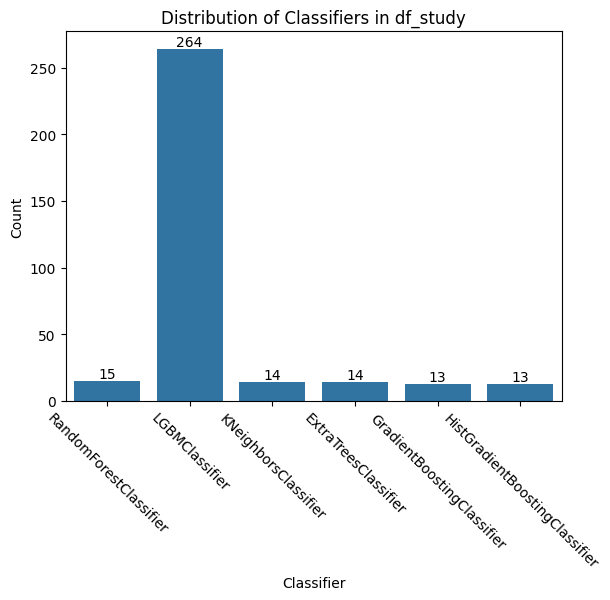

In [ ]:
ax = sns.countplot(data=df_study, x='params_classifier')

# Add count labels to bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(), str(int(bar.get_height())),
            va='bottom', ha='center')

# Rotate x-axis labels for better readability
plt.xticks(rotation=-45)
plt.xlabel('Classifier')
plt.ylabel('Count')
plt.title('Distribution of Classifiers in df_study')
plt.show()

### STATS

In [ ]:
#avg of every classifer
study.trials_dataframe().groupby('params_classifier')['value'].mean()

params_classifier
ExtraTreesClassifier              0.901278
GradientBoostingClassifier        0.883943
HistGradientBoostingClassifier    0.927532
KNeighborsClassifier              0.915736
LGBMClassifier                    0.953931
RandomForestClassifier            0.869568
Name: value, dtype: float64

In [ ]:
#Median of every classifer
study.trials_dataframe().groupby('params_classifier')['value'].median()

params_classifier
ExtraTreesClassifier              0.897577
GradientBoostingClassifier        0.869568
HistGradientBoostingClassifier    0.934045
KNeighborsClassifier              0.911645
LGBMClassifier                    0.954810
RandomForestClassifier            0.869568
Name: value, dtype: float64

In [ ]:
#avg of every classifer
study.trials_dataframe().groupby('params_classifier')['value'].std()

params_classifier
ExtraTreesClassifier              0.019302
GradientBoostingClassifier        0.022724
HistGradientBoostingClassifier    0.013064
KNeighborsClassifier              0.015100
LGBMClassifier                    0.005519
RandomForestClassifier            0.000000
Name: value, dtype: float64

#### MAX

In [ ]:
# best max accuracy w.r.t every classifier

study.trials_dataframe().groupby('params_classifier')['value'].max()

params_classifier
ExtraTreesClassifier              0.924239
GradientBoostingClassifier        0.939214
HistGradientBoostingClassifier    0.941653
KNeighborsClassifier              0.935407
LGBMClassifier                    0.955366
RandomForestClassifier            0.869568
Name: value, dtype: float64

### Viz

In [ ]:
# For visualizations
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [ ]:
# 1. Optimization History
plot_optimization_history(study).show()

In [ ]:
# 2. Parallel Coordinates Plot
plot_parallel_coordinate(study).show()

[W 2024-10-27 11:32:22,946] Your study has only completed trials with missing parameters.


In [ ]:
# 3. Slice Plot
plot_slice(study).show()

In [ ]:
# 4. Contour Plot
plot_contour(study).show()

/usr/local/lib/python3.10/dist-packages/optuna/visualization/_contour.py:193: UserWarning:

Contour plot will not be displayed because `algorithm` and `boosting_type` cannot co-exist in `trial.params`.

/usr/local/lib/python3.10/dist-packages/optuna/visualization/_contour.py:193: UserWarning:

Contour plot will not be displayed because `algorithm` and `bootstrap` cannot co-exist in `trial.params`.

/usr/local/lib/python3.10/dist-packages/optuna/visualization/_contour.py:193: UserWarning:

Contour plot will not be displayed because `algorithm` and `criterion` cannot co-exist in `trial.params`.

/usr/local/lib/python3.10/dist-packages/optuna/visualization/_contour.py:193: UserWarning:

Contour plot will not be displayed because `algorithm` and `l2_regularization` cannot co-exist in `trial.params`.

/usr/local/lib/python3.10/dist-packages/optuna/visualization/_contour.py:193: UserWarning:

Contour plot will not be displayed because `algorithm` and `learning_rate` cannot co-exist in `trial

In [ ]:
# 5. Hyperparameter Importance
plot_param_importances(study).show()

In [ ]:
! pip install lightgbm

In [ ]:
!pip install dask[dataframe]

In [ ]:
from lightgbm import LGBMClassifier

classifier = LGBMClassifier(n_estimators= 513, max_depth= 39, boosting_type="gbdt" , learning_rate= .1694,
                            min_child_samples= 20, reg_lambda=.8958 )

classifier

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(learning_rate=0.1694, max_depth=39, n_estimators=513,
               reg_lambda=0.8958)

In [ ]:
classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 27346, number of negative: 182305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1580
[LightGBM] [Info] Number of data points in the train set: 209651, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130436 -> initscore=-1.897111
[LightGBM] [Info] Start training from score -1.897111


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(learning_rate=0.1694, max_depth=39, n_estimators=513,
               reg_lambda=0.8958)

In [ ]:
y_pred=classifier.predict(X_test)

## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, jaccard_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9541961794376476

In [ ]:
jaccard_score(y_test, y_pred, average='weighted', pos_label=1)

0.91304537610154

In [ ]:
confusion_matrix(y_test, y_pred)

array([[20062,   195],
       [  872,  2166]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     20257
           1       0.92      0.71      0.80      3038

    accuracy                           0.95     23295
   macro avg       0.94      0.85      0.89     23295
weighted avg       0.95      0.95      0.95     23295



<Axes: >

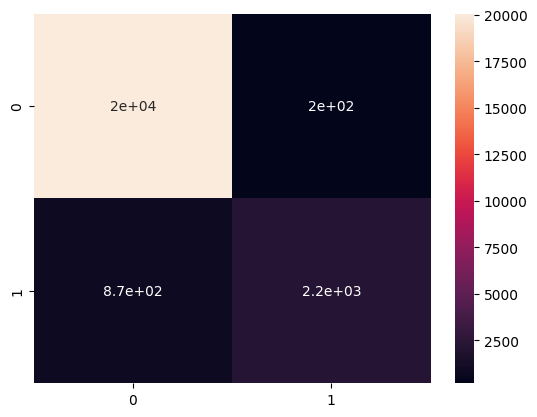

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

TRain evaluate

In [ ]:
train_predict = classifier.predict(X_train)

In [ ]:
accuracy_score(y_train, train_predict)

0.9701599324591822

In [ ]:
jaccard_score(y_train, train_predict, average='weighted', pos_label=1)

0.9418975828688342

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    182305
           1       0.97      0.79      0.87     27346

    accuracy                           0.97    209651
   macro avg       0.97      0.90      0.93    209651
weighted avg       0.97      0.97      0.97    209651



In [ ]:
confusion_matrix(y_train, train_predict)

array([[181661,    644],
       [  5612,  21734]])

<Axes: >

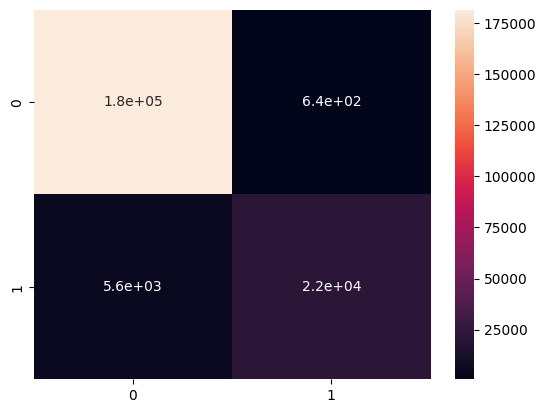

In [ ]:
sns.heatmap(confusion_matrix(y_train, train_predict), annot=True)

In [ ]:
import pickle as p

In [ ]:
# Save the model
with open('model.pkl', 'wb') as file:
    p.dump(classifier, file)

print("Model saved successfully!")

Model saved successfully!


# Ploting

In [ ]:
from lightgbm import plot_importance
from lightgbm import plot_split_value_histogram
from lightgbm import plot_tree
from lightgbm import create_tree_digraph

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

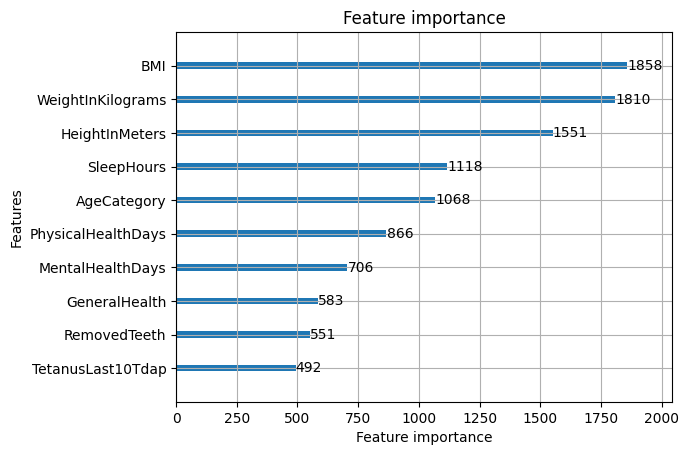

In [ ]:
plot_importance(classifier, max_num_features=10) #result contains numbers of times the feature is used in a model.

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

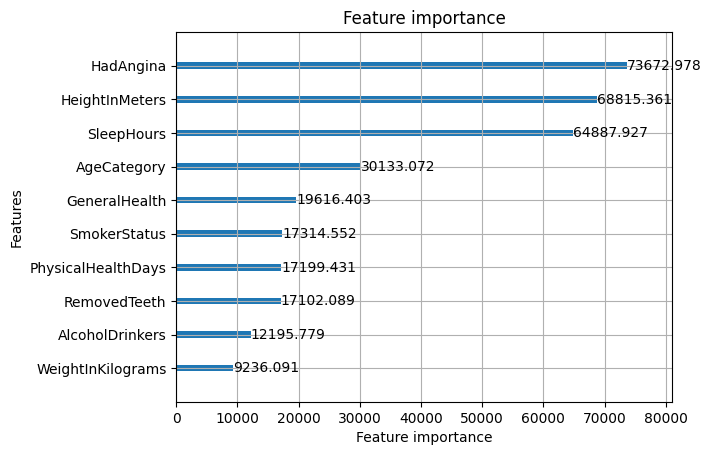

In [ ]:
plot_importance(classifier, max_num_features=10, importance_type="gain")
# "gain" represents the improvement in the model's performance
# brought about by using a particular feature for splitting at a node in a tree.

<Axes: title={'center': 'Split value histogram for feature with name BMI'}, xlabel='Feature split value', ylabel='Count'>

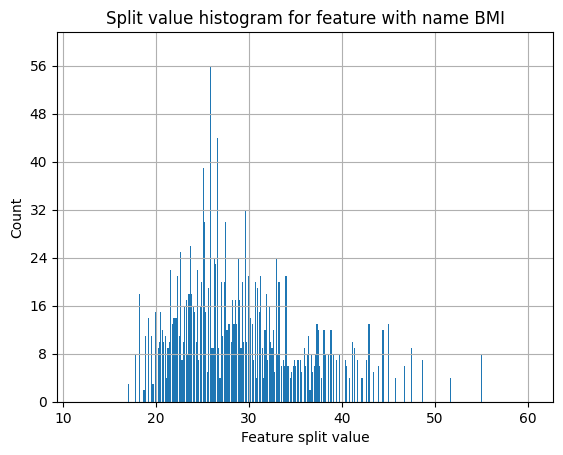

In [ ]:
plot_split_value_histogram(classifier, feature="BMI")

In [ ]:
! pip install graphviz

<Axes: >

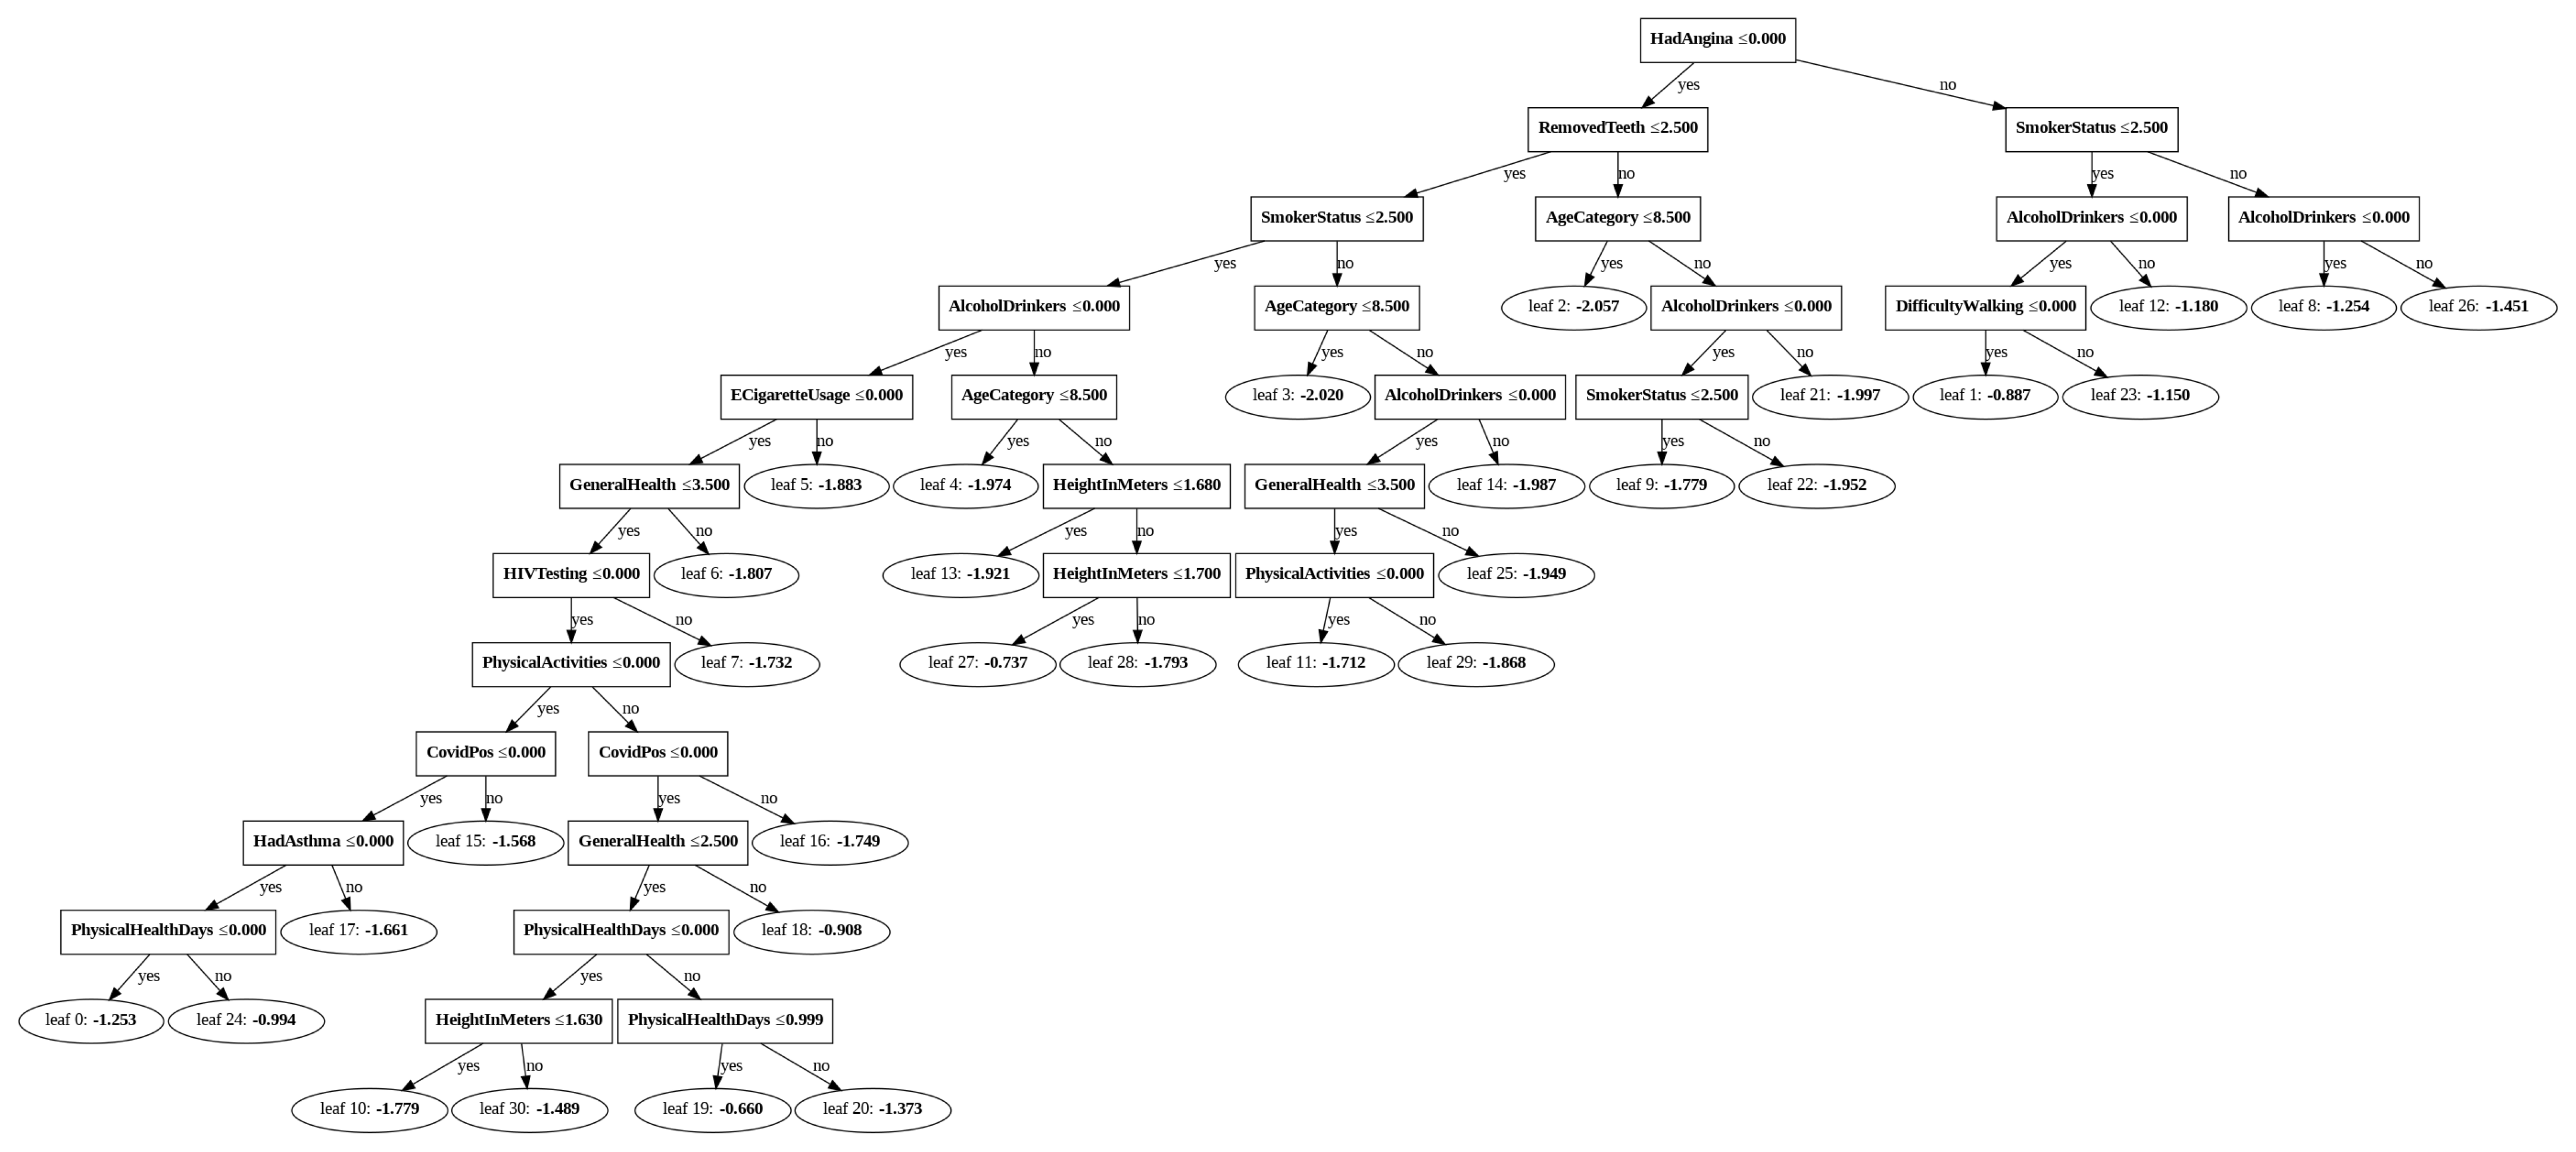

In [ ]:
plot_tree(classifier, tree_index=0, figsize=(23,23), orientation="vertical", dpi=240,)

<Axes: >

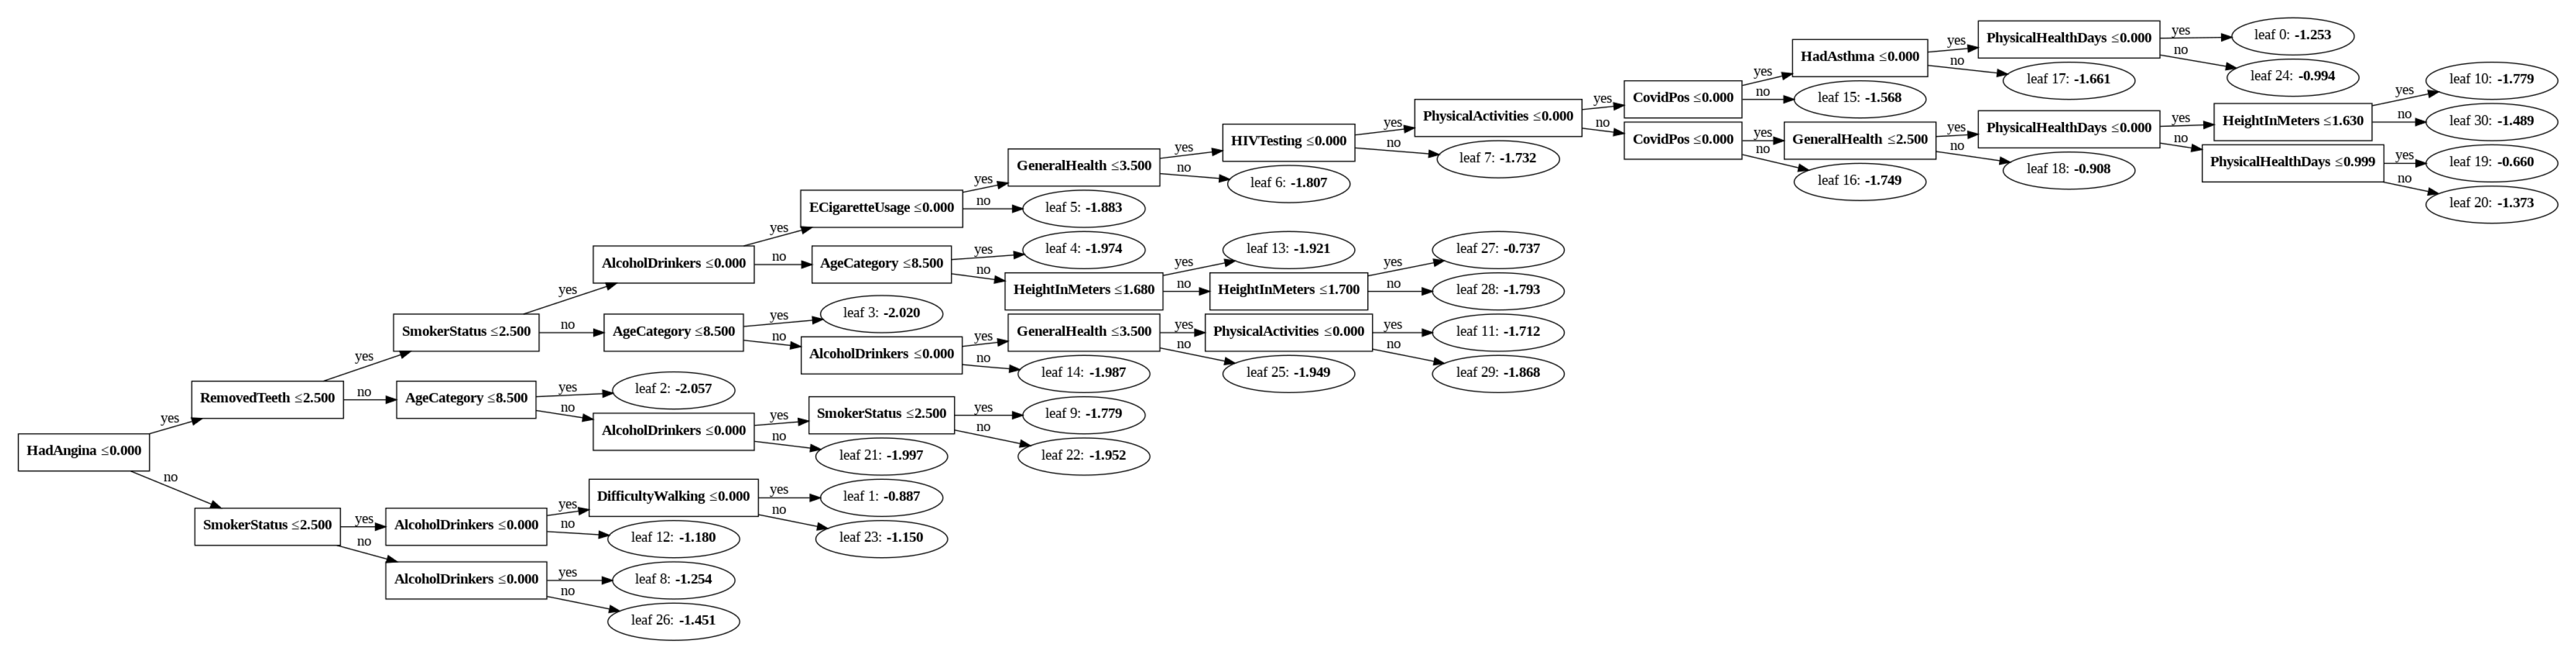

In [ ]:
plot_tree(classifier, tree_index=0, figsize=(23,23), dpi=240)

<Axes: >

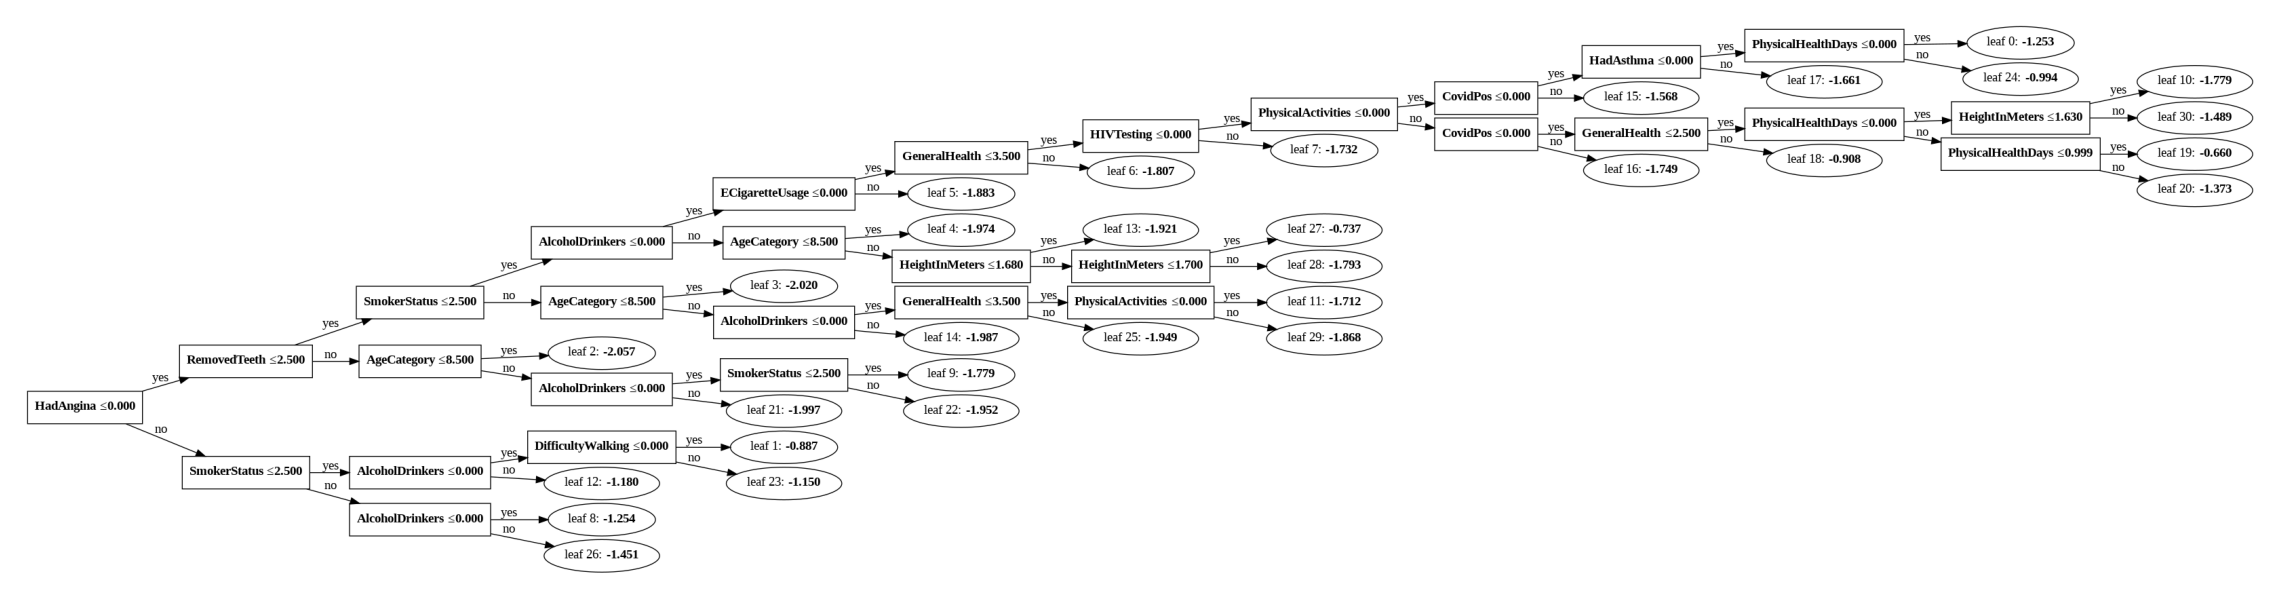

In [ ]:
plot_tree(classifier, tree_index=0, figsize=(12,12), dpi=240)

<Axes: >

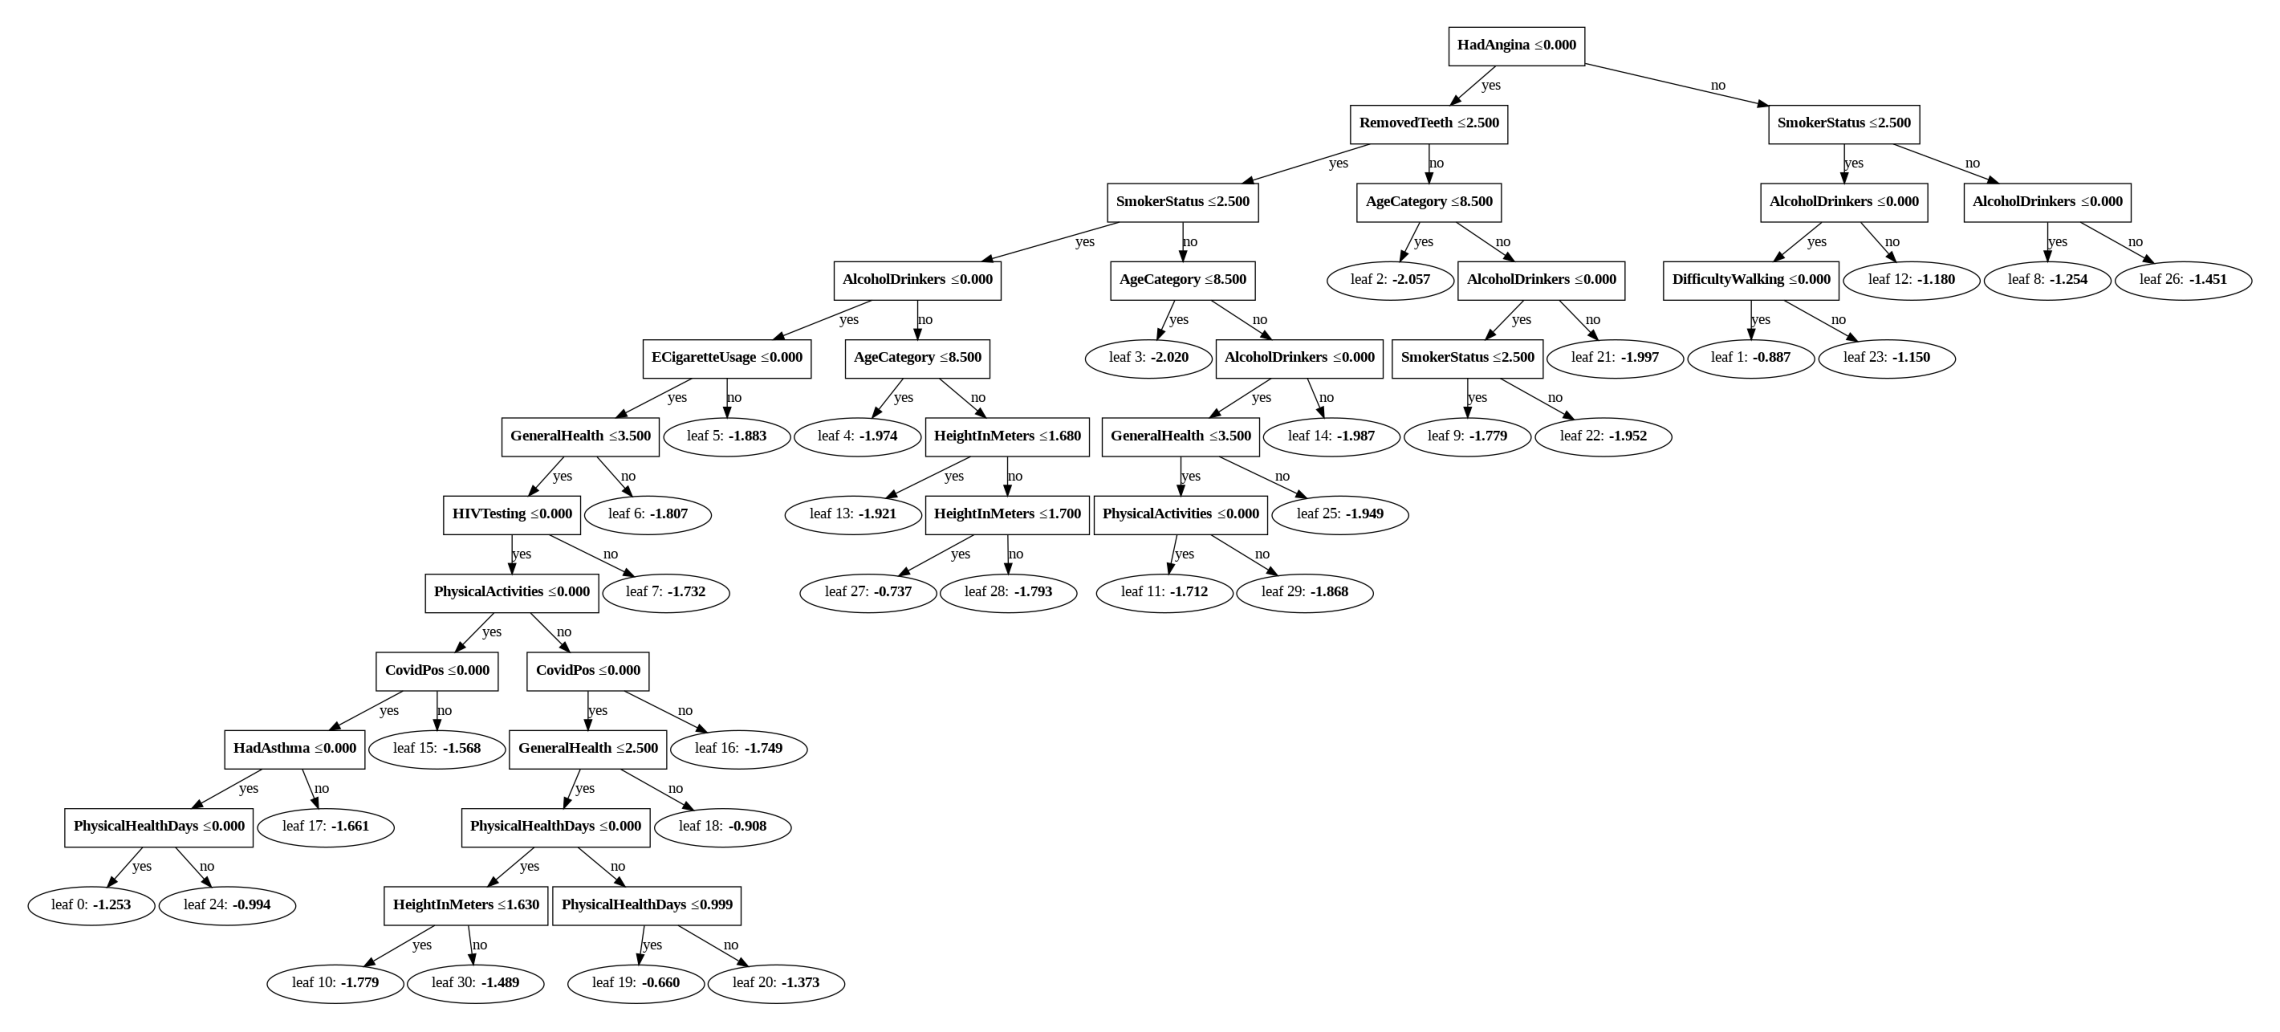

In [ ]:
plot_tree(classifier, tree_index=0, figsize=(12,12), orientation="vertical", dpi=240)

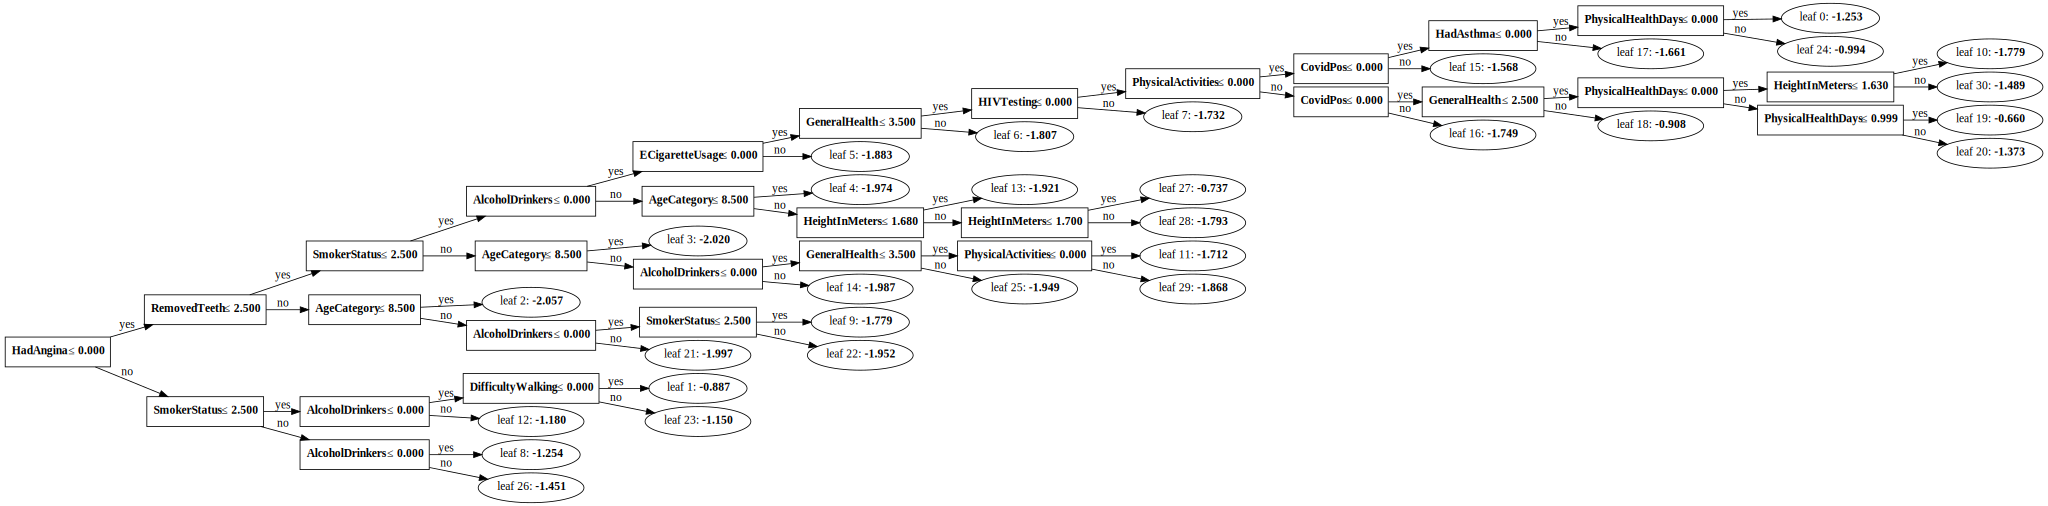

In [ ]:
create_tree_digraph(classifier, tree_index=0,)
